<h1><center>Temperature Change</center></h1>

Earth's air temperature has been rising since the Industrial Revolution. Though natural events also have a part, the dominance of evidence shows that human activities are making the planet warmer; activities such as using fossil fuels in factories, power plants, and motor vehicles and emitting greenhouse gases. <br>
The Average global temperature has increased at least by 1.1 °C since 1980. Since 1975, the average temperature has been increasing by 0.15 to 0.20 °C every decade, according to GISS.
Now, global warming does not mean an equal increase of temperature all over Earth's surface and at the same rate; some areas may have a 2-degree rise and some other regions may get a drop in temperature by 5 degrees; some countries get an exceptionally cold winter and some other experience a very warm winter. <br>
The temperatures we experience in our lives in the places that we live can fluctuate over a short period due to cycles like night and day, summer and winter, and other predictable or unpredictable events. However, the Earth's temperature mostly depends on how much energy it receives from the Sun and how much of that energy Earth radiates back into space. The energy we receive from the Sun, barely fluctuates by year, though the radiated energy by Earth varies based on the chemical composition of its atmosphere: the more greenhouse gases we emit into the air, the more heat gets trapped in the atmosphere and doesn't leave the Earth. <br>
It takes a great amount of heat to warm all of the oceans, the atmosphere, and the land by one degree and that is why even a one-degree change in the global temperature is significant; as a two-degree drop in the Earth's temperature has caused the Little Ice Age in the past and a five-degree drop was enough to carpet a large part of North America with ice 20,000 years ago.

The porpose of this project is to explore the data we have on temperature change and to look at the association between different parameters such as world population, GDP, agricultural lands and greenhouse gases with the global temperature change.

The questions I posed and the story may be biased, due to the fact that we already know differet factors such as greenhouse gas emissions and world population affect the temperature and climate change, either directly or in an indirect way.

### Content
- Introduction and basic information
- Guiding questions
- Importing libraries and datasets
- Basic EDA of the datasets
- Exploring the answers to the questions

<a id='questions'></a>
### Questions 

1. <a href='#question1'>Which years have had the most extreme temperature changes?</a>
2. <a href='#question2'>Which months from which years have had the greatest temperature change?</a>
3. <a href='#question3'>What were the seasons with the most temperature change?</a>
4. <a href='#question4'>How was each continent and region affected by the temperature change?</a>
5. <a href='#question5'>Which countries in each continent had the greatest temperature change in 2020? Which areas had the most temperature fluctuation overall?</a>
6. <a href='#question6'>What's the association between temperature change and population?</a>
7. <a href='#question7'>Is there an assiciation between economic expansion and temperature change?</a>
8. <a href='#question8'>Does agriculture growth correlate with temperature change?</a>
9. <a href='#question9'>How do different greenhouse gases affect temperature change?</a>
10. <a href='#question10'>Are GDP and greenhouse gases associated?</a>

### The datasets I used:
- The [FAOSTAT](https://www.fao.org/faostat/en/#data/ET) Temperature Change
- [World](https://www.kaggle.com/datasets/vaishnavivenkatesan/world-population) [population](https://www.kaggle.com/datasets/tanuprabhu/population-by-country-2020)
- [Country codes](https://www.kaggle.com/datasets/koki25ando/country-code)
- [Continents and regions](https://statisticstimes.com/geography/countries-by-continents.php)
- [World GDP](https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths)
- [FAOSTAT](https://www.fao.org/faostat/en/#data/RL) Land use
- [OWID](https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions#co2-and-greenhouse-gas-emissions-country-profiles) CO2 and Greenhouse Gas Emissions Country Profiles

I did all the changes to the datasets I used and all the data cleaning codes in another notebook and imported them to directly use the cleaned datasets here; therefore you won't see any data cleaning process in this notebook.

I also mapped months and created a new column called "Seasons" so I could use that later in my EDA.

**Importing the libraries and the datasets**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, plot,iplot
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()
%matplotlib inline

In [2]:
# This is the primary dataset I used in this project
df = pd.read_csv('FAOSTAT_data_1-10-2022.csv')

In [3]:
# importing world population, GDP, aggriculture and greenhouse gases datasets
world_population = pd.read_csv('World Population 1960 - 2020.csv')
gdp = pd.read_csv('GDP + Regions')
agriculture = pd.read_csv('Agriculture 1961 - 2020')
ghg = pd.read_csv('ghg')

In [4]:
gdp.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
agriculture.rename(columns={'Unnamed: 0':'Year'}, inplace=True)

In [6]:
agriculture.set_index('Year', inplace=True)

In [7]:
ghg.drop('Unnamed: 0', axis=1, inplace=True)

## Basic EDA of the datasets

In [8]:
# The Primary dataset
df.head()

Domain Code              Domain  Area Code (FAO)         Area  Element Code  \
0          ET  Temperature change                2  Afghanistan          7271   
1          ET  Temperature change                2  Afghanistan          7271   
2          ET  Temperature change                2  Afghanistan          7271   
3          ET  Temperature change                2  Afghanistan          7271   
4          ET  Temperature change                2  Afghanistan          7271   

              Element  Months Code   Months  Year Code  Year Unit  Value Flag  \
0  Temperature change         7001  January       1961  1961   ?C  0.746   Fc   
1  Temperature change         7001  January       1962  1962   ?C  0.009   Fc   
2  Temperature change         7001  January       1963  1963   ?C  2.695   Fc   
3  Temperature change         7001  January       1964  1964   ?C -5.277   Fc   
4  Temperature change         7001  January       1965  1965   ?C  1.827   Fc   

  Flag Description  
0  Calculated data  
1  Calculated data  
2  Calculated data  
3  Calculated data  
4  Calculated data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229925 entries, 0 to 229924
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       229925 non-null  object 
 1   Domain            229925 non-null  object 
 2   Area Code (FAO)   229925 non-null  int64  
 3   Area              229925 non-null  object 
 4   Element Code      229925 non-null  int64  
 5   Element           229925 non-null  object 
 6   Months Code       229925 non-null  int64  
 7   Months            229925 non-null  object 
 8   Year Code         229925 non-null  int64  
 9   Year              229925 non-null  int64  
 10  Unit              229925 non-null  object 
 11  Value             222012 non-null  float64
 12  Flag              229925 non-null  object 
 13  Flag Description  229925 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 24.6+ MB


In [10]:
df.describe()

Area Code (FAO)  Element Code    Months Code      Year Code  \
count    229925.000000      229925.0  229925.000000  229925.000000   
mean        130.647689        7271.0    7009.882353    1991.306248   
std          76.809008           0.0       6.037955      17.333252   
min           1.000000        7271.0    7001.000000    1961.000000   
25%          64.000000        7271.0    7005.000000    1976.000000   
50%         131.000000        7271.0    7009.000000    1992.000000   
75%         194.000000        7271.0    7016.000000    2006.000000   
max         351.000000        7271.0    7020.000000    2020.000000   

                Year          Value  
count  229925.000000  222012.000000  
mean     1991.306248       0.492626  
std        17.333252       1.036364  
min      1961.000000      -9.303000  
25%      1976.000000      -0.071000  
50%      1992.000000       0.414000  
75%      2006.000000       0.999000  
max      2020.000000      11.759000

#### The temperature Change dataset 

In [11]:
# I cleaned the primary dataset, added and removed columns such as Domain Code, Domain, Element, Year Code, Unit, etc.
# and added ISO2, ISO3, Region, Continent, and Seasons columns
temp_change = pd.read_csv('cleaned + ISO region continent seasons')

In [12]:
temp_change.drop('Unnamed: 0', axis=1, inplace=True)

Basic EDA of the main dataframe

In [13]:
temp_change.head()

Area Code (FAO)         Area  Months Code   Months  Year  Value Flag  \
0                2  Afghanistan         7001  January  1961  0.746   Fc   
1                2  Afghanistan         7001  January  1962  0.009   Fc   
2                2  Afghanistan         7001  January  1963  2.695   Fc   
3                2  Afghanistan         7001  January  1964 -5.277   Fc   
4                2  Afghanistan         7001  January  1965  1.827   Fc   

  Flag Description ISO2 ISO3         Region Continent Seasons  
0  Calculated data   AF  AFG  Southern Asia      Asia  Winter  
1  Calculated data   AF  AFG  Southern Asia      Asia  Winter  
2  Calculated data   AF  AFG  Southern Asia      Asia  Winter  
3  Calculated data   AF  AFG  Southern Asia      Asia  Winter  
4  Calculated data   AF  AFG  Southern Asia      Asia  Winter

FAO area codes and regions and continents are added to the primary dataset, as well as seasons.
The recorded data of temperature change in the column "Value" is in Celsius (°C).

In [14]:
temp_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212245 entries, 0 to 212244
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Area Code (FAO)   212245 non-null  int64  
 1   Area              212245 non-null  object 
 2   Months Code       212245 non-null  int64  
 3   Months            212245 non-null  object 
 4   Year              212245 non-null  int64  
 5   Value             205752 non-null  float64
 6   Flag              212245 non-null  object 
 7   Flag Description  212245 non-null  object 
 8   ISO2              212245 non-null  object 
 9   ISO3              212245 non-null  object 
 10  Region            212245 non-null  object 
 11  Continent         212245 non-null  object 
 12  Seasons           137335 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 21.1+ MB


In [15]:
sns.set_style(style='whitegrid')

In [16]:
usa =  temp_change[temp_change['Area'] == 'United States of America']
china = temp_change[temp_change['Area'].str.contains('China')]
canada = temp_change[temp_change['Area'] == 'Canada']
russia = temp_change[temp_change['Area'] == 'Russian Federation']

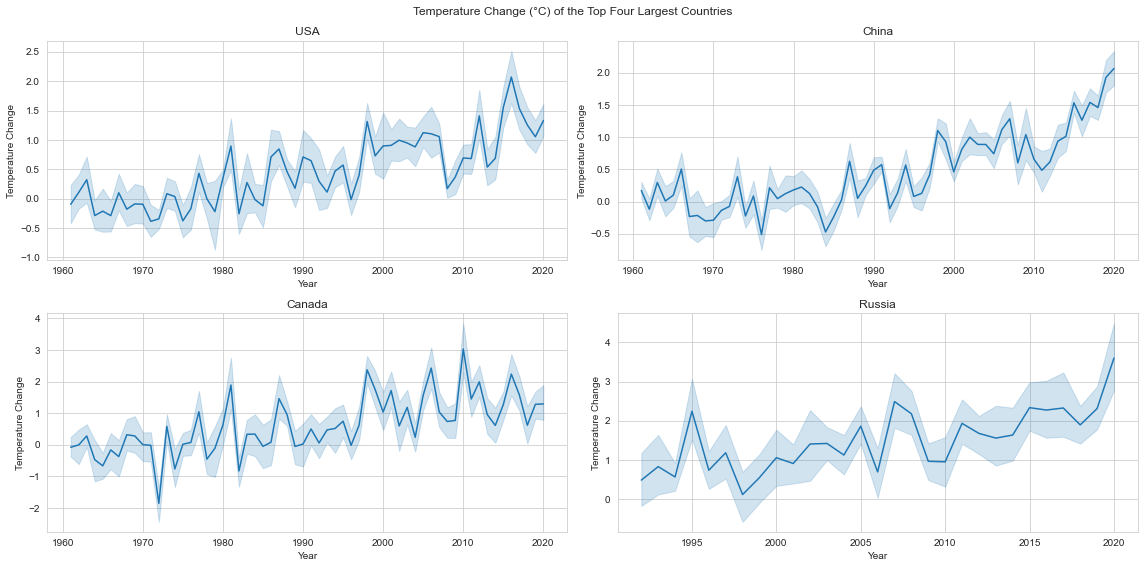

In [17]:
# Plotting the temperature changes in the largest countries of the world over the years
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
sns.lineplot(x='Year', y='Value', data=russia, ax=ax[1,1]).set(title='Russia', ylabel='Temperature Change')
sns.lineplot(x='Year', y='Value', data=canada, ax=ax[1,0]).set(title='Canada', ylabel='Temperature Change')
sns.lineplot(x='Year', y='Value', data=china, ax=ax[0,1]).set(title='China', ylabel='Temperature Change')
sns.lineplot(x='Year', y='Value', data=usa, ax=ax[0,0]).set(title='USA', ylabel='Temperature Change')
plt.suptitle('Temperature Change (°C) of the Top Four Largest Countries')
plt.tight_layout()

In [18]:
# I used the meteoro;ogical year values throughout this notebook in many places, to avoid multiple values recorded by months
#  and to use only one value per country in each year 
meteorological_year = temp_change[temp_change['Months'] == 'Meteorological year']

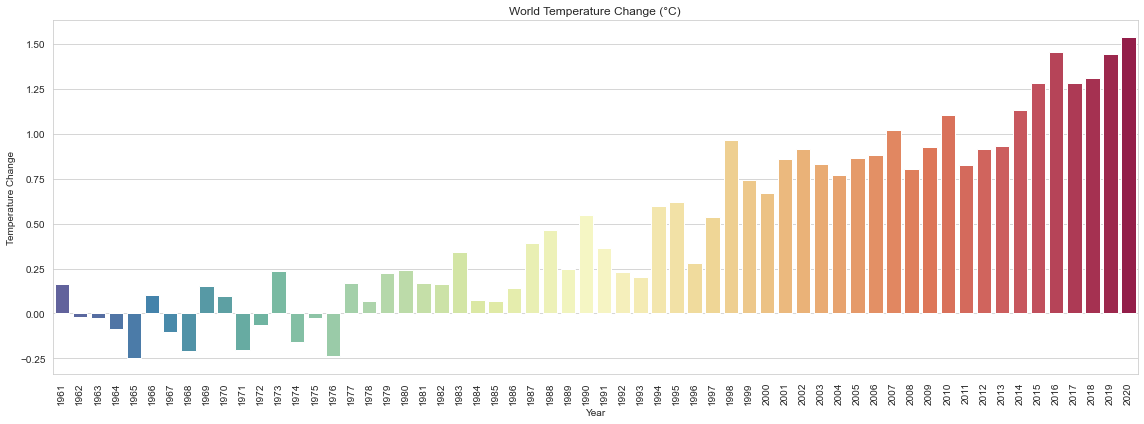

In [19]:
# World's temperature change by year
plt.figure(figsize=(16,6))
sns.barplot(x='Year', y='Value', data=meteorological_year, ci=None, palette='Spectral_r')
plt.ylabel('Temperature Change')
plt.xticks(rotation=90)
plt.title('World Temperature Change (°C)')
plt.tight_layout()

In [20]:
# Temperature change of the world through 1960 to 2020
fig = px.choropleth(meteorological_year, locations="ISO3", color="Value", hover_name="Area", animation_frame="Year", range_color=[-2, 3.5], color_continuous_scale='Turbo', title="World's Temperature Change")
fig.show()

#### World Population dataset

In [21]:
world_population.head()

Year      ABW        AFG        AGO        ALB      AND       ARE  \
0  1960  54211.0  8996973.0  5454933.0  1608800.0  13411.0   92418.0   
1  1961  55438.0  9169410.0  5531472.0  1659800.0  14375.0  100796.0   
2  1962  56225.0  9351441.0  5608539.0  1711319.0  15370.0  112118.0   
3  1963  56695.0  9543205.0  5679458.0  1762621.0  16412.0  125130.0   
4  1964  57032.0  9744781.0  5735044.0  1814135.0  17469.0  138039.0   

          ARG        ARM      ASM  ...        URY        UZB     VGB      VUT  \
0  20481779.0  1874121.0  20123.0  ...  2538643.0  8526300.0  8048.0  63689.0   
1  20817266.0  1941492.0  20602.0  ...  2571681.0  8813616.0  8167.0  65705.0   
2  21153052.0  2009526.0  21253.0  ...  2603882.0  9113620.0  8310.0  67794.0   
3  21488912.0  2077578.0  22034.0  ...  2635126.0  9428906.0  8476.0  69946.0   
4  21824425.0  2145001.0  22854.0  ...  2665388.0  9762816.0  8646.0  72115.0   

        WSM        YEM         ZAF        ZMB        ZWE  World Population  
0  108629.0  5315355.0  17099840.0  3070776.0  3776681.0        3034949748  
1  112105.0  5393036.0  17524533.0  3164329.0  3905034.0        3091843507  
2  115776.0  5473671.0  17965725.0  3260650.0  4039201.0        3150420795  
3  119559.0  5556766.0  18423161.0  3360104.0  4178726.0        3211001009  
4  123342.0  5641597.0  18896307.0  3463213.0  4322861.0        3273978338  

[5 rows x 189 columns]

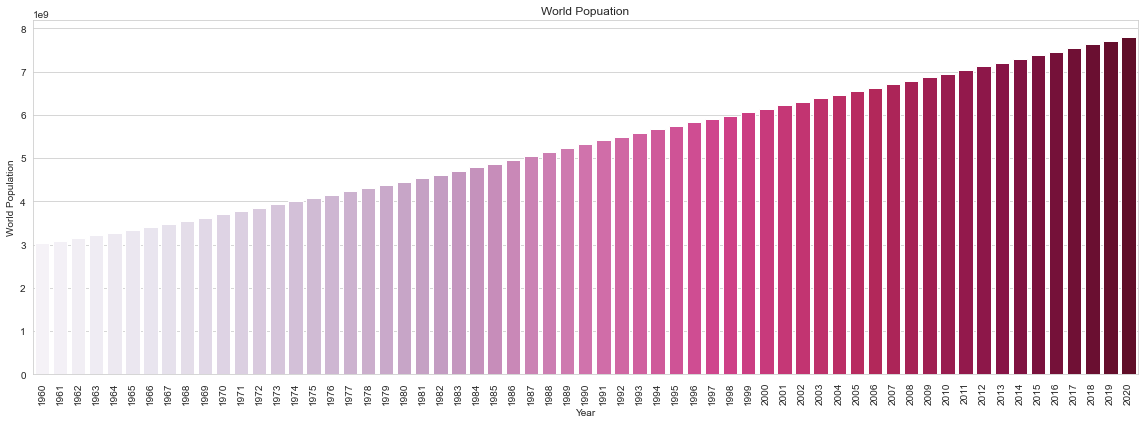

In [22]:
# World population by year
plt.figure(figsize=(16,6))
sns.barplot(x='Year', y='World Population',data=world_population, palette='PuRd')
plt.xticks(rotation=90)
plt.title('World Popuation')
plt.tight_layout()

#### World GDP dataset 

In [23]:
# I groupped the dataset by continent to later analyse the correlation between GDP and temerature change in each continent
gdp_transposed = gdp.groupby('Continent').mean().transpose()

In [24]:
gdp_transposed.index = gdp_transposed.index.astype(int)

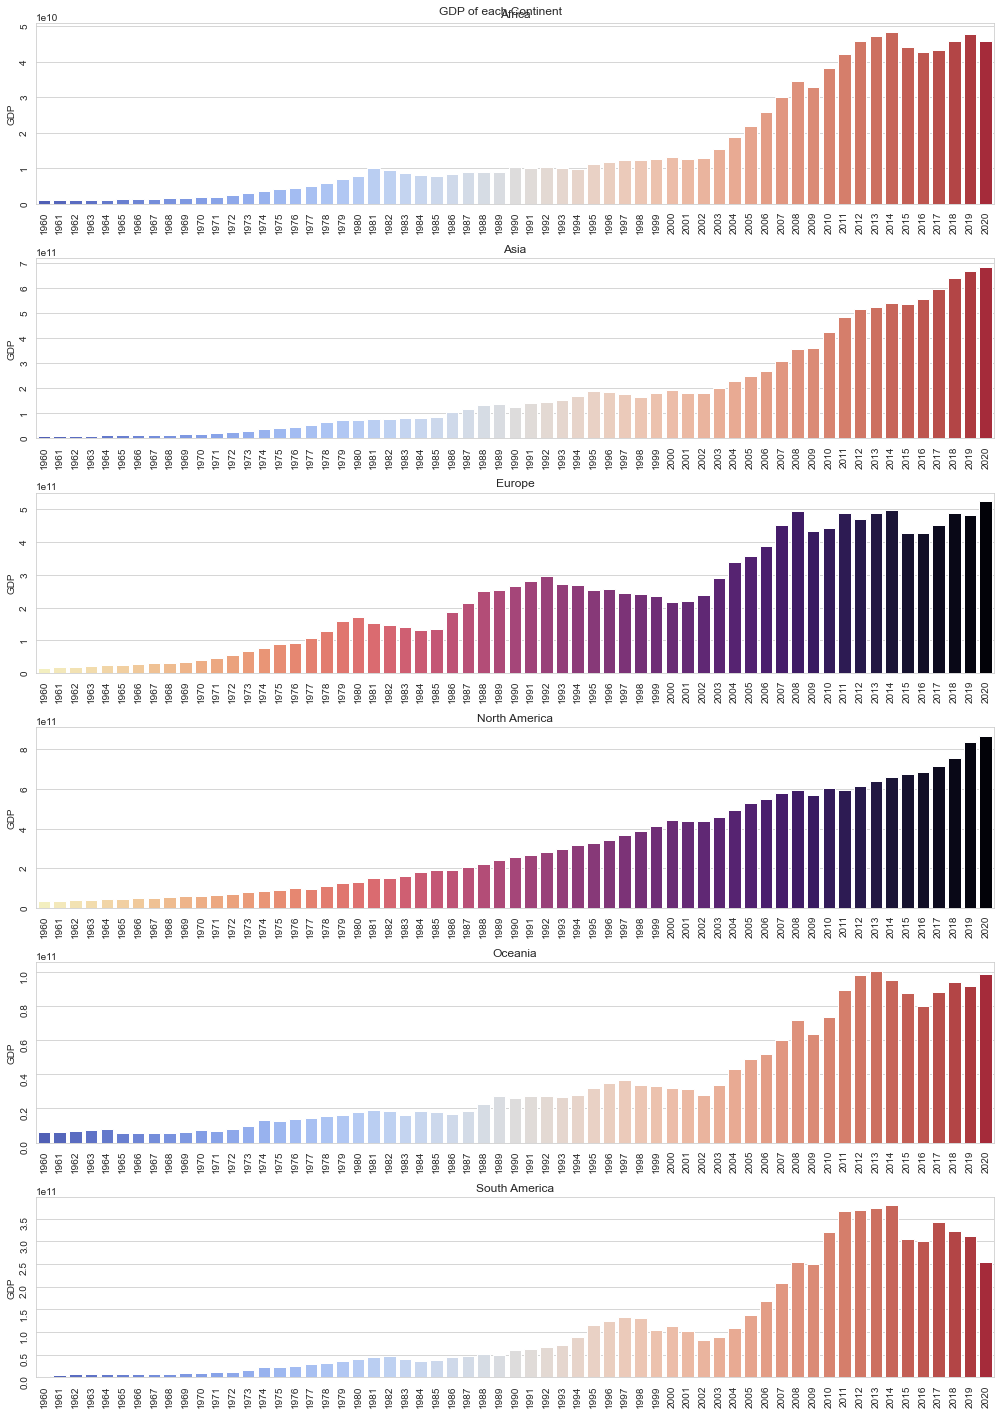

In [25]:
# GDP growth of each continent from 1960 to 2020
fix, ax = plt.subplots(nrows=6, figsize=(14,20), )
sns.barplot(x=gdp_transposed.index, y='Africa', data=gdp_transposed, ax=ax[0], palette='coolwarm').set(title='Africa', ylabel='GDP')
sns.barplot(x=gdp_transposed.index, y='Asia', data=gdp_transposed, ax=ax[1], palette='coolwarm').set(title='Asia', ylabel='GDP')
sns.barplot(x=gdp_transposed.index, y='Europe', data=gdp_transposed, ax=ax[2], palette='magma_r').set(title='Europe', ylabel='GDP')
sns.barplot(x=gdp_transposed.index, y='North America', data=gdp_transposed, ax=ax[3], palette='magma_r').set(title='North America', ylabel='GDP')
sns.barplot(x=gdp_transposed.index, y='Oceania', data=gdp_transposed, ax=ax[4], palette='coolwarm').set(title='Oceania', ylabel='GDP')
sns.barplot(x=gdp_transposed.index, y='South America', data=gdp_transposed, ax=ax[5], palette='coolwarm').set(title='South America', ylabel='GDP')
for x in range(0,6):
    ax[x].tick_params(labelrotation=90)
plt.suptitle('GDP of each Continent')
plt.tight_layout()

#### Agricultural Land dataset

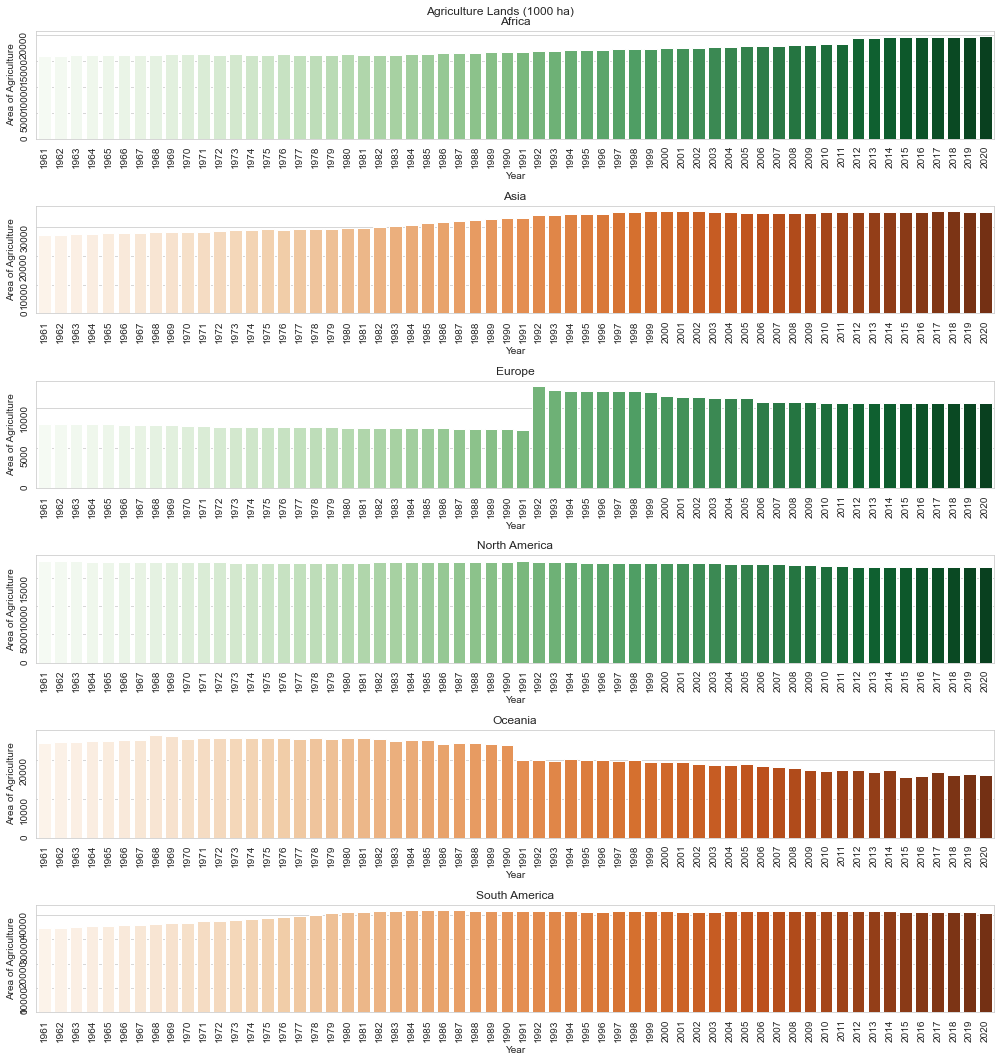

In [26]:
# Area of agricultural lands in each continent by year
fig, ax = plt.subplots(nrows=6, figsize=(14,15))
sns.barplot(x=agriculture.index, y='Africa', data=agriculture, ax=ax[0], palette='Greens').set(title='Africa', ylabel='Area of Agriculture')
sns.barplot(x=agriculture.index, y='Asia', data=agriculture, ax=ax[1], palette='Oranges').set(title='Asia', ylabel='Area of Agriculture')
sns.barplot(x=agriculture.index, y='Europe', data=agriculture, ax=ax[2], palette='Greens').set(title='Europe', ylabel='Area of Agriculture')
sns.barplot(x=agriculture.index, y='North America', data=agriculture, ax=ax[3], palette='Greens').set(title='North America', ylabel='Area of Agriculture')
sns.barplot(x=agriculture.index, y='Oceania', data=agriculture, ax=ax[4], palette='Oranges').set(title='Oceania', ylabel='Area of Agriculture')
sns.barplot(x=agriculture.index, y='South America', data=agriculture, ax=ax[5], palette='Oranges').set(title='South America', ylabel='Area of Agriculture')
for x in range(0,6):
    ax[x].tick_params(labelrotation=90)
plt.suptitle('Agriculture Lands (1000 ha)')
plt.tight_layout()

#### Greenhouse Gas Emissions dataset

In [27]:
def ghgByYear(continent):
    return ghg[ghg['Continent'] == continent].groupby('year').mean()

In [28]:
# variables to groupby the dataset for each continent
africa_ghg = ghgByYear('Africa')
asia_ghg = ghgByYear('Asia')
europe_ghg = ghgByYear('Europe')
north_america_ghg = ghgByYear('North America')
oceania_ghg = ghgByYear('Oceania')
south_america_ghg = ghgByYear('South America')

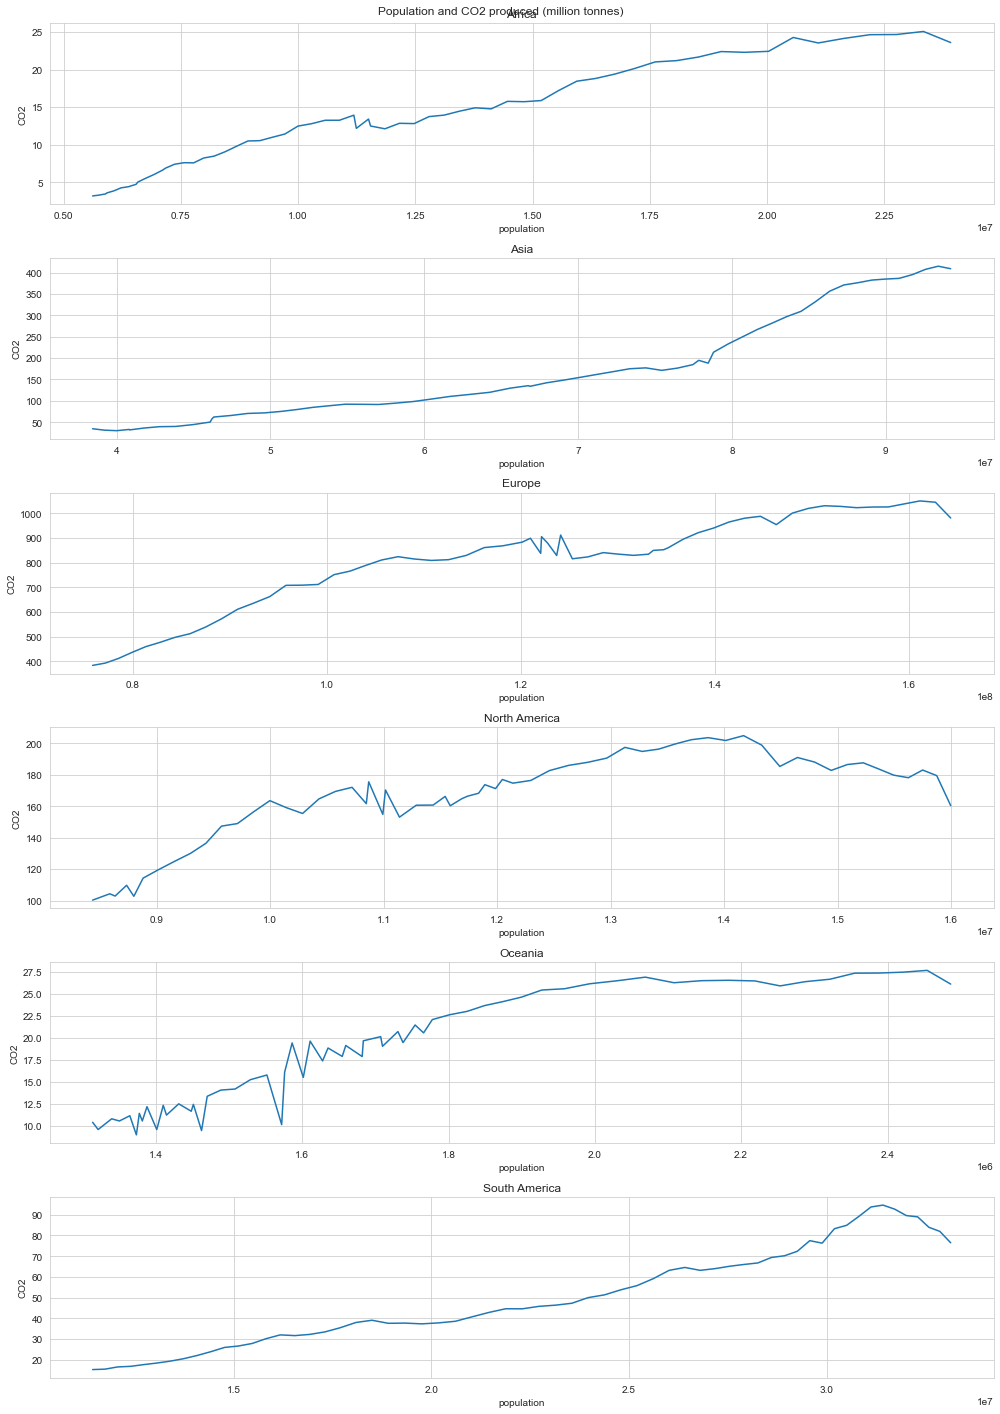

In [29]:
# Population against CO2 production in each continent
fig, ax = plt.subplots(nrows=6, figsize=(14,20))
sns.lineplot(x='population', y='CO2', data=africa_ghg, ax=ax[0], palette='flare').set_title('Africa')
sns.lineplot(x='population', y='CO2', data=asia_ghg, ax=ax[1], palette='flare').set_title('Asia')
sns.lineplot(x='population', y='CO2', data=europe_ghg, ax=ax[2], palette='flare').set_title('Europe')
sns.lineplot(x='population', y='CO2', data=north_america_ghg, ax=ax[3], palette='flare').set_title('North America')
sns.lineplot(x='population', y='CO2', data=oceania_ghg, ax=ax[4], palette='flare').set_title('Oceania')
sns.lineplot(x='population', y='CO2', data=south_america_ghg, ax=ax[5], palette='flare').set_title('South America')
plt.suptitle('Population and CO2 produced (million tonnes)')
plt.tight_layout()

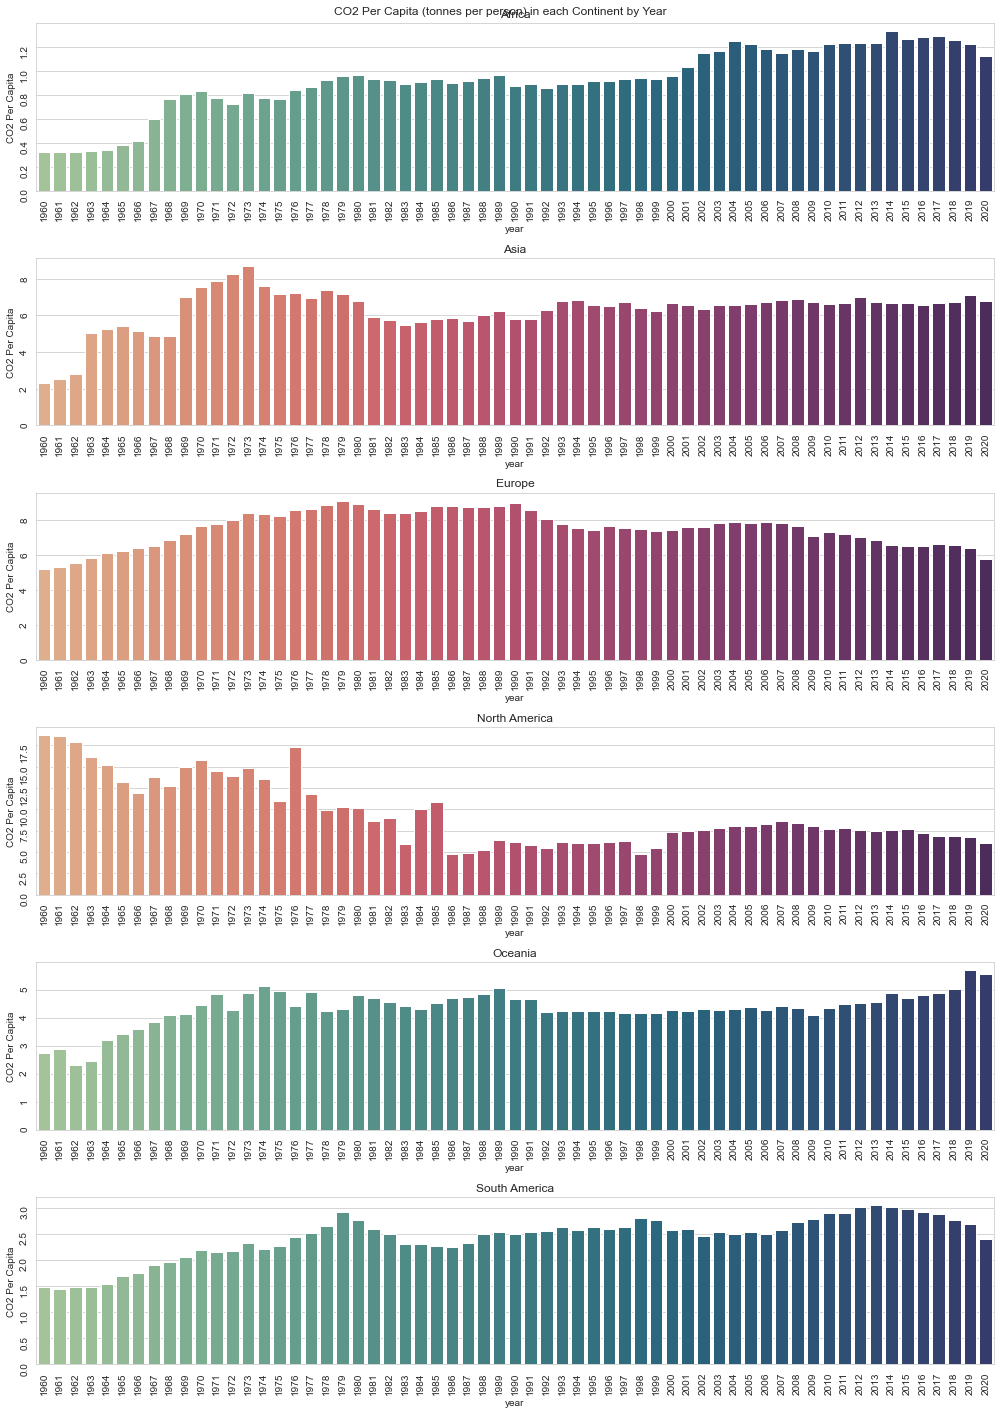

In [30]:
# The amount of CO2 produced per capita from 1960 to 2020 in each continent
fig, ax = plt.subplots(nrows=6, figsize=(14,20))
sns.barplot(x=africa_ghg.index, y='CO2 Per Capita', data=africa_ghg, ax=ax[0], palette='crest').set(title='Africa')
sns.barplot(x=asia_ghg.index, y='CO2 Per Capita', data=asia_ghg, ax=ax[1], palette='flare').set(title='Asia')
sns.barplot(x=europe_ghg.index, y='CO2 Per Capita', data=europe_ghg, ax=ax[2], palette='flare').set(title='Europe')
sns.barplot(x=north_america_ghg.index, y='CO2 Per Capita', data=north_america_ghg, ax=ax[3], palette='flare').set(title='North America')
sns.barplot(x=oceania_ghg.index, y='CO2 Per Capita', data=oceania_ghg, ax=ax[4], palette='crest').set(title='Oceania')
sns.barplot(x=south_america_ghg.index, y='CO2 Per Capita', data=south_america_ghg, ax=ax[5], palette='crest').set(title='South America')
plt.suptitle('CO2 Per Capita (tonnes per person) in each Continent by Year')
for x in range(0,6):
    ax[x].tick_params(labelrotation=90)
plt.tight_layout()

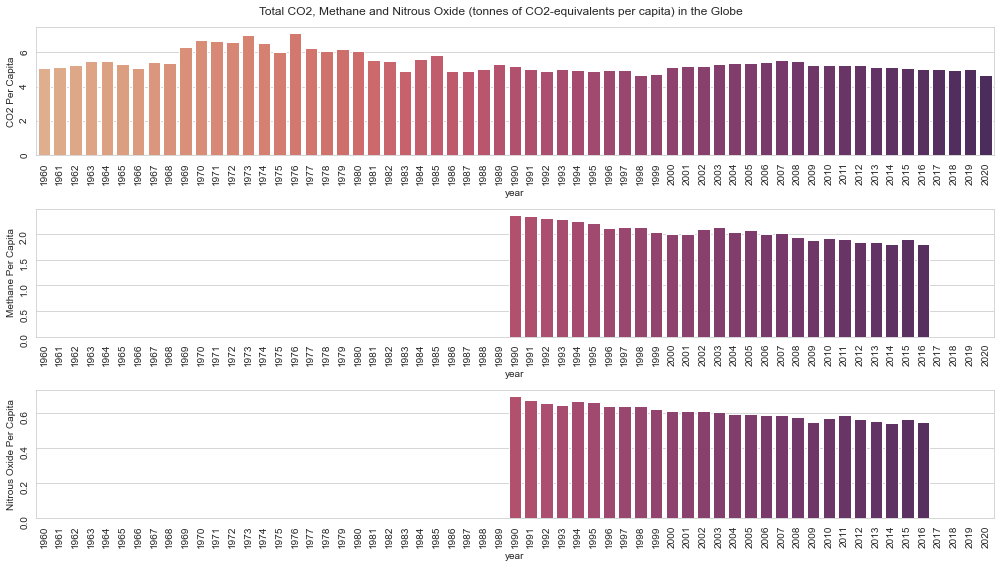

In [31]:
# The CO2, methane and nitrous oxide per capita of the world
fig, ax = plt.subplots(nrows=3, figsize=(14,8))
sns.barplot(x='year', y='CO2 Per Capita', data=ghg, ax=ax[0], ci=None, palette='flare')
sns.barplot(x='year', y='Methane Per Capita', data=ghg, ax=ax[1], ci=None, palette='flare')
sns.barplot(x='year',y='Nitrous Oxide Per Capita', data=ghg, ax=ax[2], ci=None, palette='flare')
for x in range(0,3):
    ax[x].tick_params(labelrotation=90)
plt.suptitle('Total CO2, Methane and Nitrous Oxide (tonnes of CO2-equivalents per capita) in the Globe')
plt.tight_layout()

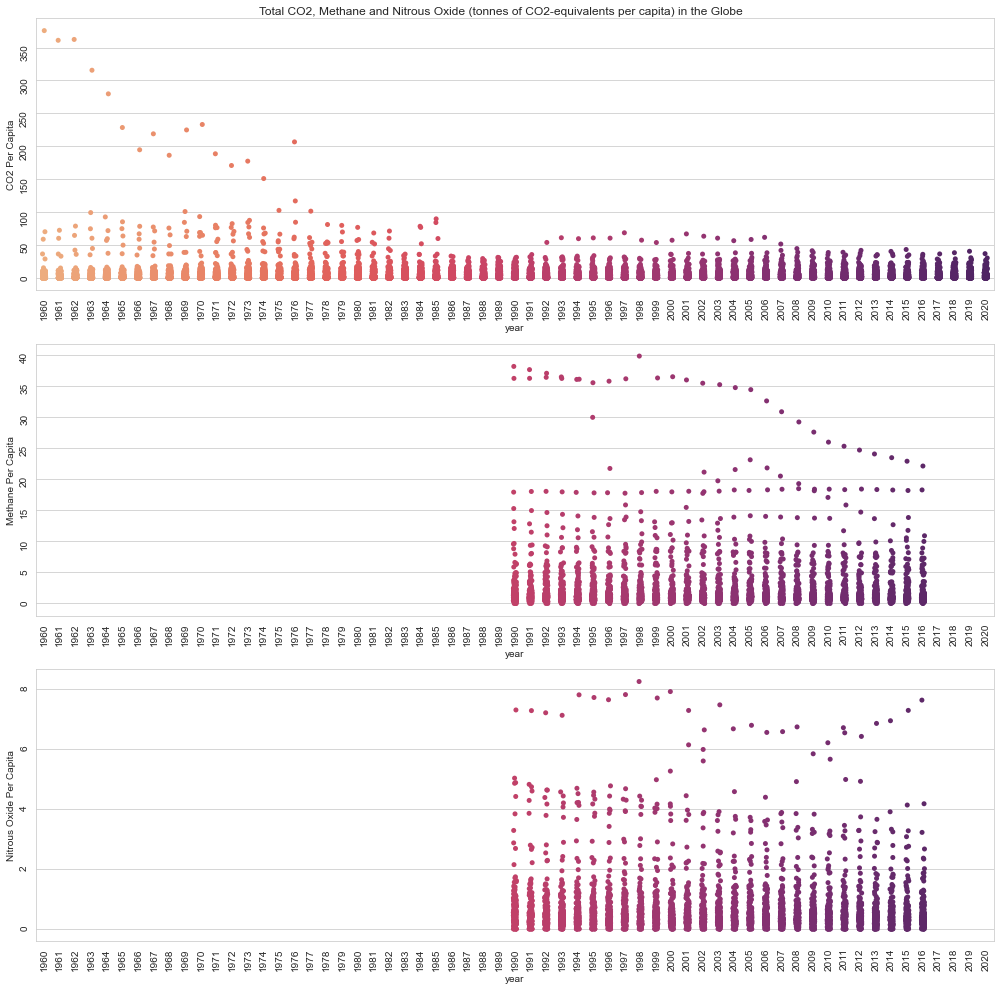

In [32]:
# The CO2, methane and nitrous oxide per capita of the world
fig, ax = plt.subplots(nrows=3, figsize=(14,14))
sns.stripplot(x='year', y='CO2 Per Capita', data=ghg, ax=ax[0], palette='flare')
sns.stripplot(x='year', y='Methane Per Capita', data=ghg, ax=ax[1], palette='flare')
sns.stripplot(x='year',y='Nitrous Oxide Per Capita', data=ghg, ax=ax[2], palette='flare')
for x in range(0,3):
    ax[x].tick_params(labelrotation=90)
plt.suptitle('Total CO2, Methane and Nitrous Oxide (tonnes of CO2-equivalents per capita) in the Globe')
plt.tight_layout()

In [33]:
# The GHG Per Capita column had a lot of mising values so I dropped them in order to make a better visualization
africa_ghg_dropna = africa_ghg.dropna()
asia_ghg_dropna = asia_ghg.dropna()
europe_ghg_dropna = europe_ghg.dropna()
north_america_ghg_dropna = north_america_ghg.dropna()
oceania_ghg_dropna = oceania_ghg.dropna()
south_america_ghg_dropna = south_america_ghg.dropna()

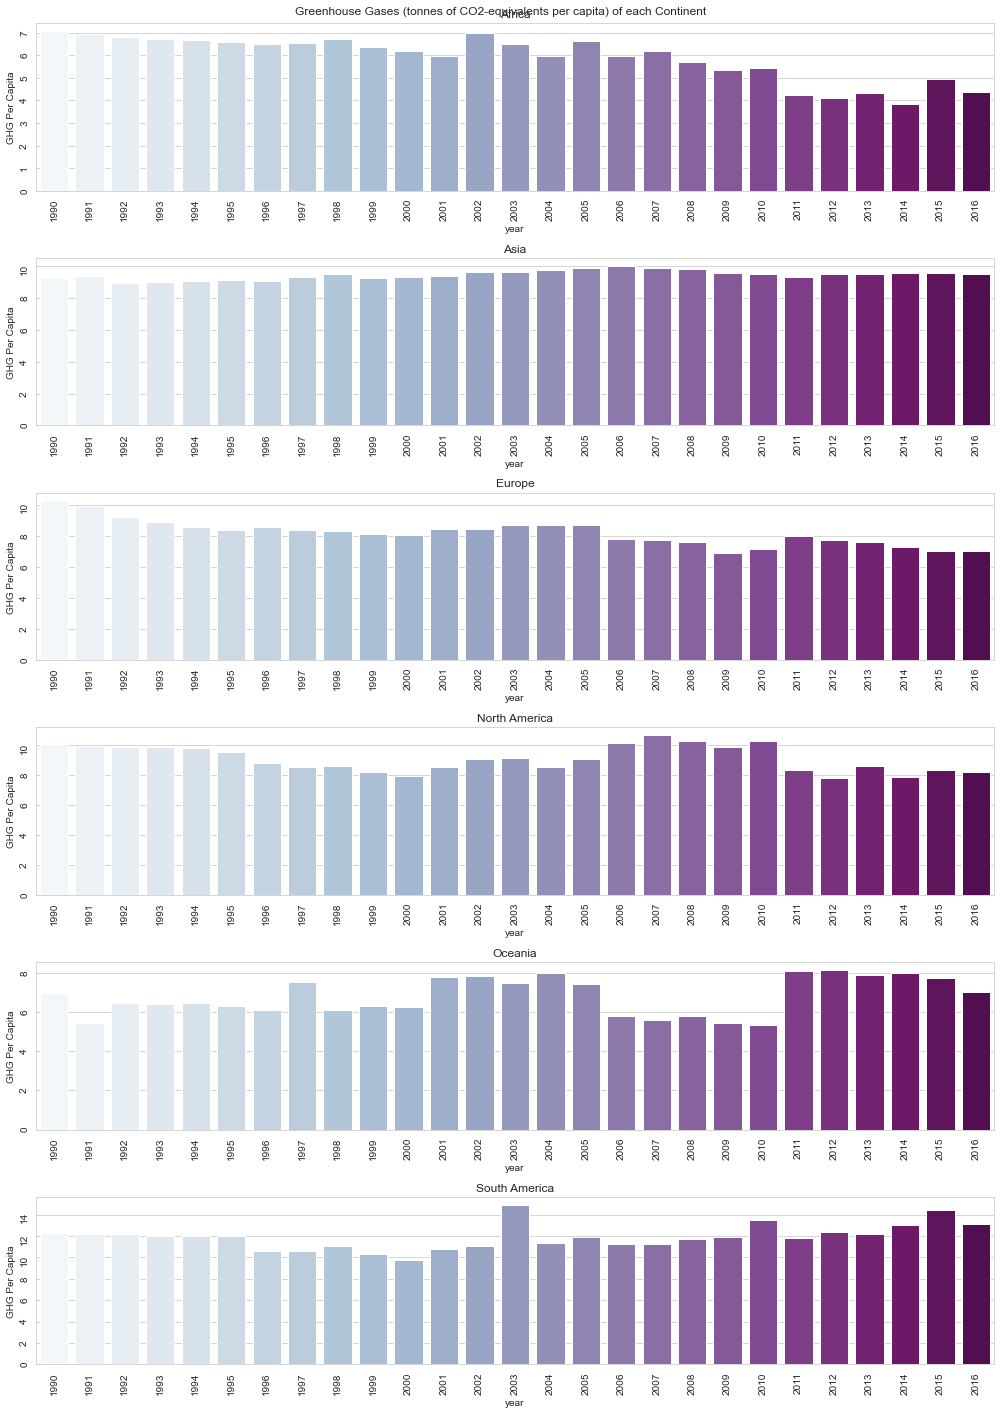

In [34]:
# Greenhouse gases per capita of each continent from 1990 to 2016
fig, ax = plt.subplots(nrows=6, figsize=(14,20))
sns.barplot(x=africa_ghg_dropna.index, y='GHG Per Capita', data=africa_ghg_dropna, ax=ax[0], palette='BuPu').set(title='Africa')
sns.barplot(x=asia_ghg_dropna.index, y='GHG Per Capita', data=asia_ghg_dropna, ax=ax[1], palette='BuPu').set(title='Asia')
sns.barplot(x=europe_ghg_dropna.index, y='GHG Per Capita', data=europe_ghg_dropna, ax=ax[2], palette='BuPu').set(title='Europe')
sns.barplot(x=north_america_ghg_dropna.index, y='GHG Per Capita', data=north_america_ghg_dropna, ax=ax[3], palette='BuPu').set(title='North America')
sns.barplot(x=oceania_ghg_dropna.index, y='GHG Per Capita', data=oceania_ghg_dropna, ax=ax[4], palette='BuPu').set(title='Oceania')
sns.barplot(x=south_america_ghg_dropna.index, y='GHG Per Capita', data=south_america_ghg_dropna, ax=ax[5], palette='BuPu').set(title='South America')
for x in range(0,6):
    ax[x].tick_params(labelrotation=90)
plt.suptitle('Greenhouse Gases (tonnes of CO2-equivalents per capita) of each Continent')
plt.tight_layout()

## Exploring the Questions

<a id='question1'></a>
### Question 1
###### Which years have had the most extreme temperature changes ?

In [35]:
# Years with highest temperature change
meteorological_year.groupby('Year')['Value'].mean().sort_values(ascending=False).head(10)

Year
2020    1.542721
2016    1.454414
2019    1.447458
2018    1.313074
2017    1.285221
2015    1.283417
2014    1.131218
2010    1.105767
2007    1.019839
1998    0.967962
Name: Value, dtype: float64

In [36]:
# Years with least amount of change in temperature
least_change = meteorological_year.groupby('Year')['Value'].mean().sort_values(ascending=False).round(2)
least_change[(least_change.values <= 0.1) & (-0.1 <= least_change.values)]

Year
1966    0.10
1970    0.10
1984    0.08
1978    0.07
1985    0.07
1962   -0.02
1975   -0.03
1963   -0.03
1972   -0.06
1964   -0.09
Name: Value, dtype: float64

In [37]:
# Years with largest negative temperature change
meteorological_year.groupby('Year')['Value'].mean().sort_values().head(10)

Year
1965   -0.249376
1976   -0.237568
1968   -0.207613
1971   -0.204895
1974   -0.158115
1967   -0.105126
1964   -0.085085
1972   -0.062580
1963   -0.027232
1975   -0.026608
Name: Value, dtype: float64

<a id='question2'></a>
### Question 2
###### Which months from which years have had the greatest temperature change?

In [38]:
# Highest temperature change recorded
highest_temp = temp_change.sort_values(by='Value', ascending=False)
highest_temp.head(10)

Area Code (FAO)                            Area  Months Code  \
180806              260  Svalbard and Jan Mayen Islands         7002   
180738              260  Svalbard and Jan Mayen Islands         7001   
180744              260  Svalbard and Jan Mayen Islands         7001   
180748              260  Svalbard and Jan Mayen Islands         7001   
180918              260  Svalbard and Jan Mayen Islands         7004   
66032                67                         Finland         7002   
180746              260  Svalbard and Jan Mayen Islands         7001   
180704              260  Svalbard and Jan Mayen Islands         7001   
181376              260  Svalbard and Jan Mayen Islands         7012   
180810              260  Svalbard and Jan Mayen Islands         7002   

          Months  Year   Value Flag Flag Description ISO2 ISO3  \
180806  February  2014  11.759   Fc  Calculated data   SJ  SJM   
180738   January  2006  11.332   Fc  Calculated data   SJ  SJM   
180744   January  2012  10.827   Fc  Calculated data   SJ  SJM   
180748   January  2016  10.170   Fc  Calculated data   SJ  SJM   
180918     April  2006  10.049   Fc  Calculated data   SJ  SJM   
66032   February  1990   9.740   Fc  Calculated data   FI  FIN   
180746   January  2014   9.642   Fc  Calculated data   SJ  SJM   
180704   January  1972   9.476   Fc  Calculated data   SJ  SJM   
181376  December  1984   9.306   Fc  Calculated data   SJ  SJM   
180810  February  2018   9.114   Fc  Calculated data   SJ  SJM   

                 Region Continent Seasons  
180806  Northern Europe    Europe  Winter  
180738  Northern Europe    Europe  Winter  
180744  Northern Europe    Europe  Winter  
180748  Northern Europe    Europe  Winter  
180918  Northern Europe    Europe  Spring  
66032   Northern Europe    Europe  Winter  
180746  Northern Europe    Europe  Winter  
180704  Northern Europe    Europe  Winter  
181376  Northern Europe    Europe  Winter  
180810  Northern Europe    Europe  Winter

In [39]:
# Months recorded with the highest change in temperature in 2020
highest_months = temp_change[temp_change['Year'] == 2020].sort_values(by='Value', ascending=False)
highest_months.head(10)

Area Code (FAO)        Area  Months Code    Months  Year  Value Flag  \
60922                63     Estonia         7001   January  2020  8.720   Fc   
105190              119      Latvia         7001   January  2020  8.494   Fc   
110783              126   Lithuania         7001   January  2020  8.158   Fc   
17334                57     Belarus         7001   January  2020  8.136   Fc   
60951                63     Estonia         7002  February  2020  7.927   Fc   
100153              108  Kazakhstan         7002  February  2020  7.925   Fc   
17363                57     Belarus         7002  February  2020  7.852   Fc   
105219              119      Latvia         7002  February  2020  7.798   Fc   
110812              126   Lithuania         7002  February  2020  7.687   Fc   
66002                67     Finland         7001   January  2020  7.509   Fc   

       Flag Description ISO2 ISO3           Region Continent Seasons  
60922   Calculated data   EE  EST  Northern Europe    Europe  Winter  
105190  Calculated data   LV  LVA  Northern Europe    Europe  Winter  
110783  Calculated data   LT  LTU  Northern Europe    Europe  Winter  
17334   Calculated data   BY  BLR   Eastern Europe    Europe  Winter  
60951   Calculated data   EE  EST  Northern Europe    Europe  Winter  
100153  Calculated data   KZ  KAZ     Central Asia      Asia  Winter  
17363   Calculated data   BY  BLR   Eastern Europe    Europe  Winter  
105219  Calculated data   LV  LVA  Northern Europe    Europe  Winter  
110812  Calculated data   LT  LTU  Northern Europe    Europe  Winter  
66002   Calculated data   FI  FIN  Northern Europe    Europe  Winter

<a id='question3'></a>
### Question 3
###### What were the seasons with the highest temperature change?

In [40]:
seasons = temp_change.groupby('Seasons')

In [41]:
seasons.mean()['Value']

Seasons
Fall      0.466550
Spring    0.542239
Summer    0.549780
Winter    0.489495
Name: Value, dtype: float64

<a id='question4'></a>
### Question 4
###### How was each continent and region affected by the temperature change?

In [42]:
continents = meteorological_year.groupby('Continent').mean()

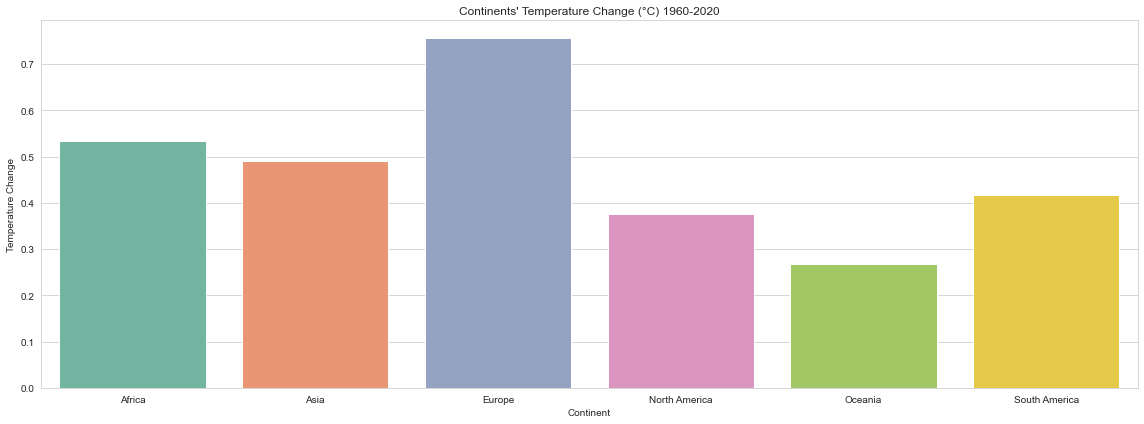

In [43]:
# The effect on each continent
plt.figure(figsize=(16,6))
sns.barplot(x=continents.index,y=continents["Value"], data=continents, palette='Set2' )
plt.ylabel('Temperature Change')
plt.title("Continents' Temperature Change (°C) 1960-2020")
plt.tight_layout()

In [44]:
regions = meteorological_year.groupby('Region').mean()

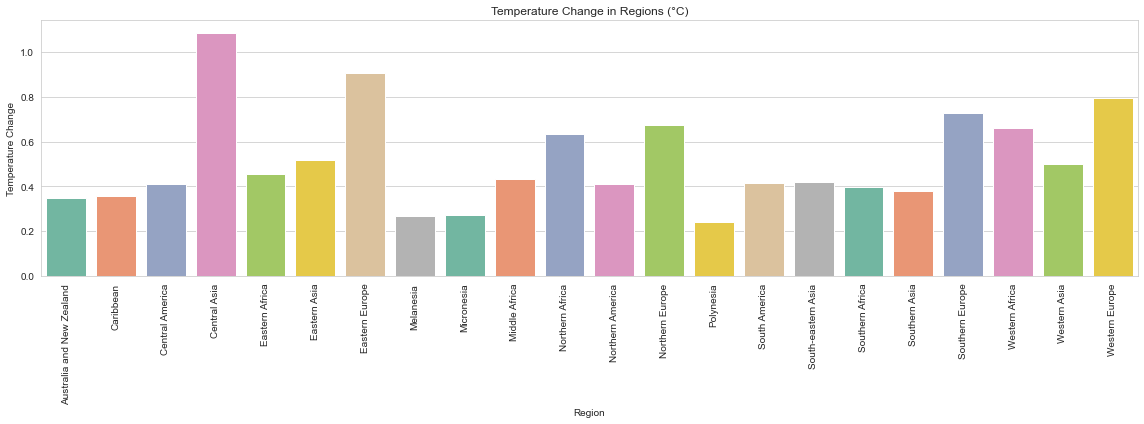

In [45]:
# Effect on each region 
plt.figure(figsize=(16,6))
sns.barplot(x=regions.index,y=regions["Value"], data=regions, palette='Set2').set_ylabel('Temperature Change')
plt.xticks(rotation=90)
plt.title('Temperature Change in Regions (°C)')
plt.tight_layout()

In [46]:
# function to then create variables for each continent
def continent(name):
    return meteorological_year[(meteorological_year['Continent'] == name) & (meteorological_year['Year'] >= 2000)]

In [47]:
# Each continent data from year 2000 to 2020
africa = continent('Africa')
asia = continent('Asia')
europe = continent('Europe')
north_america = continent('North America')
oceania = continent('Oceania')
south_america = continent('South America')

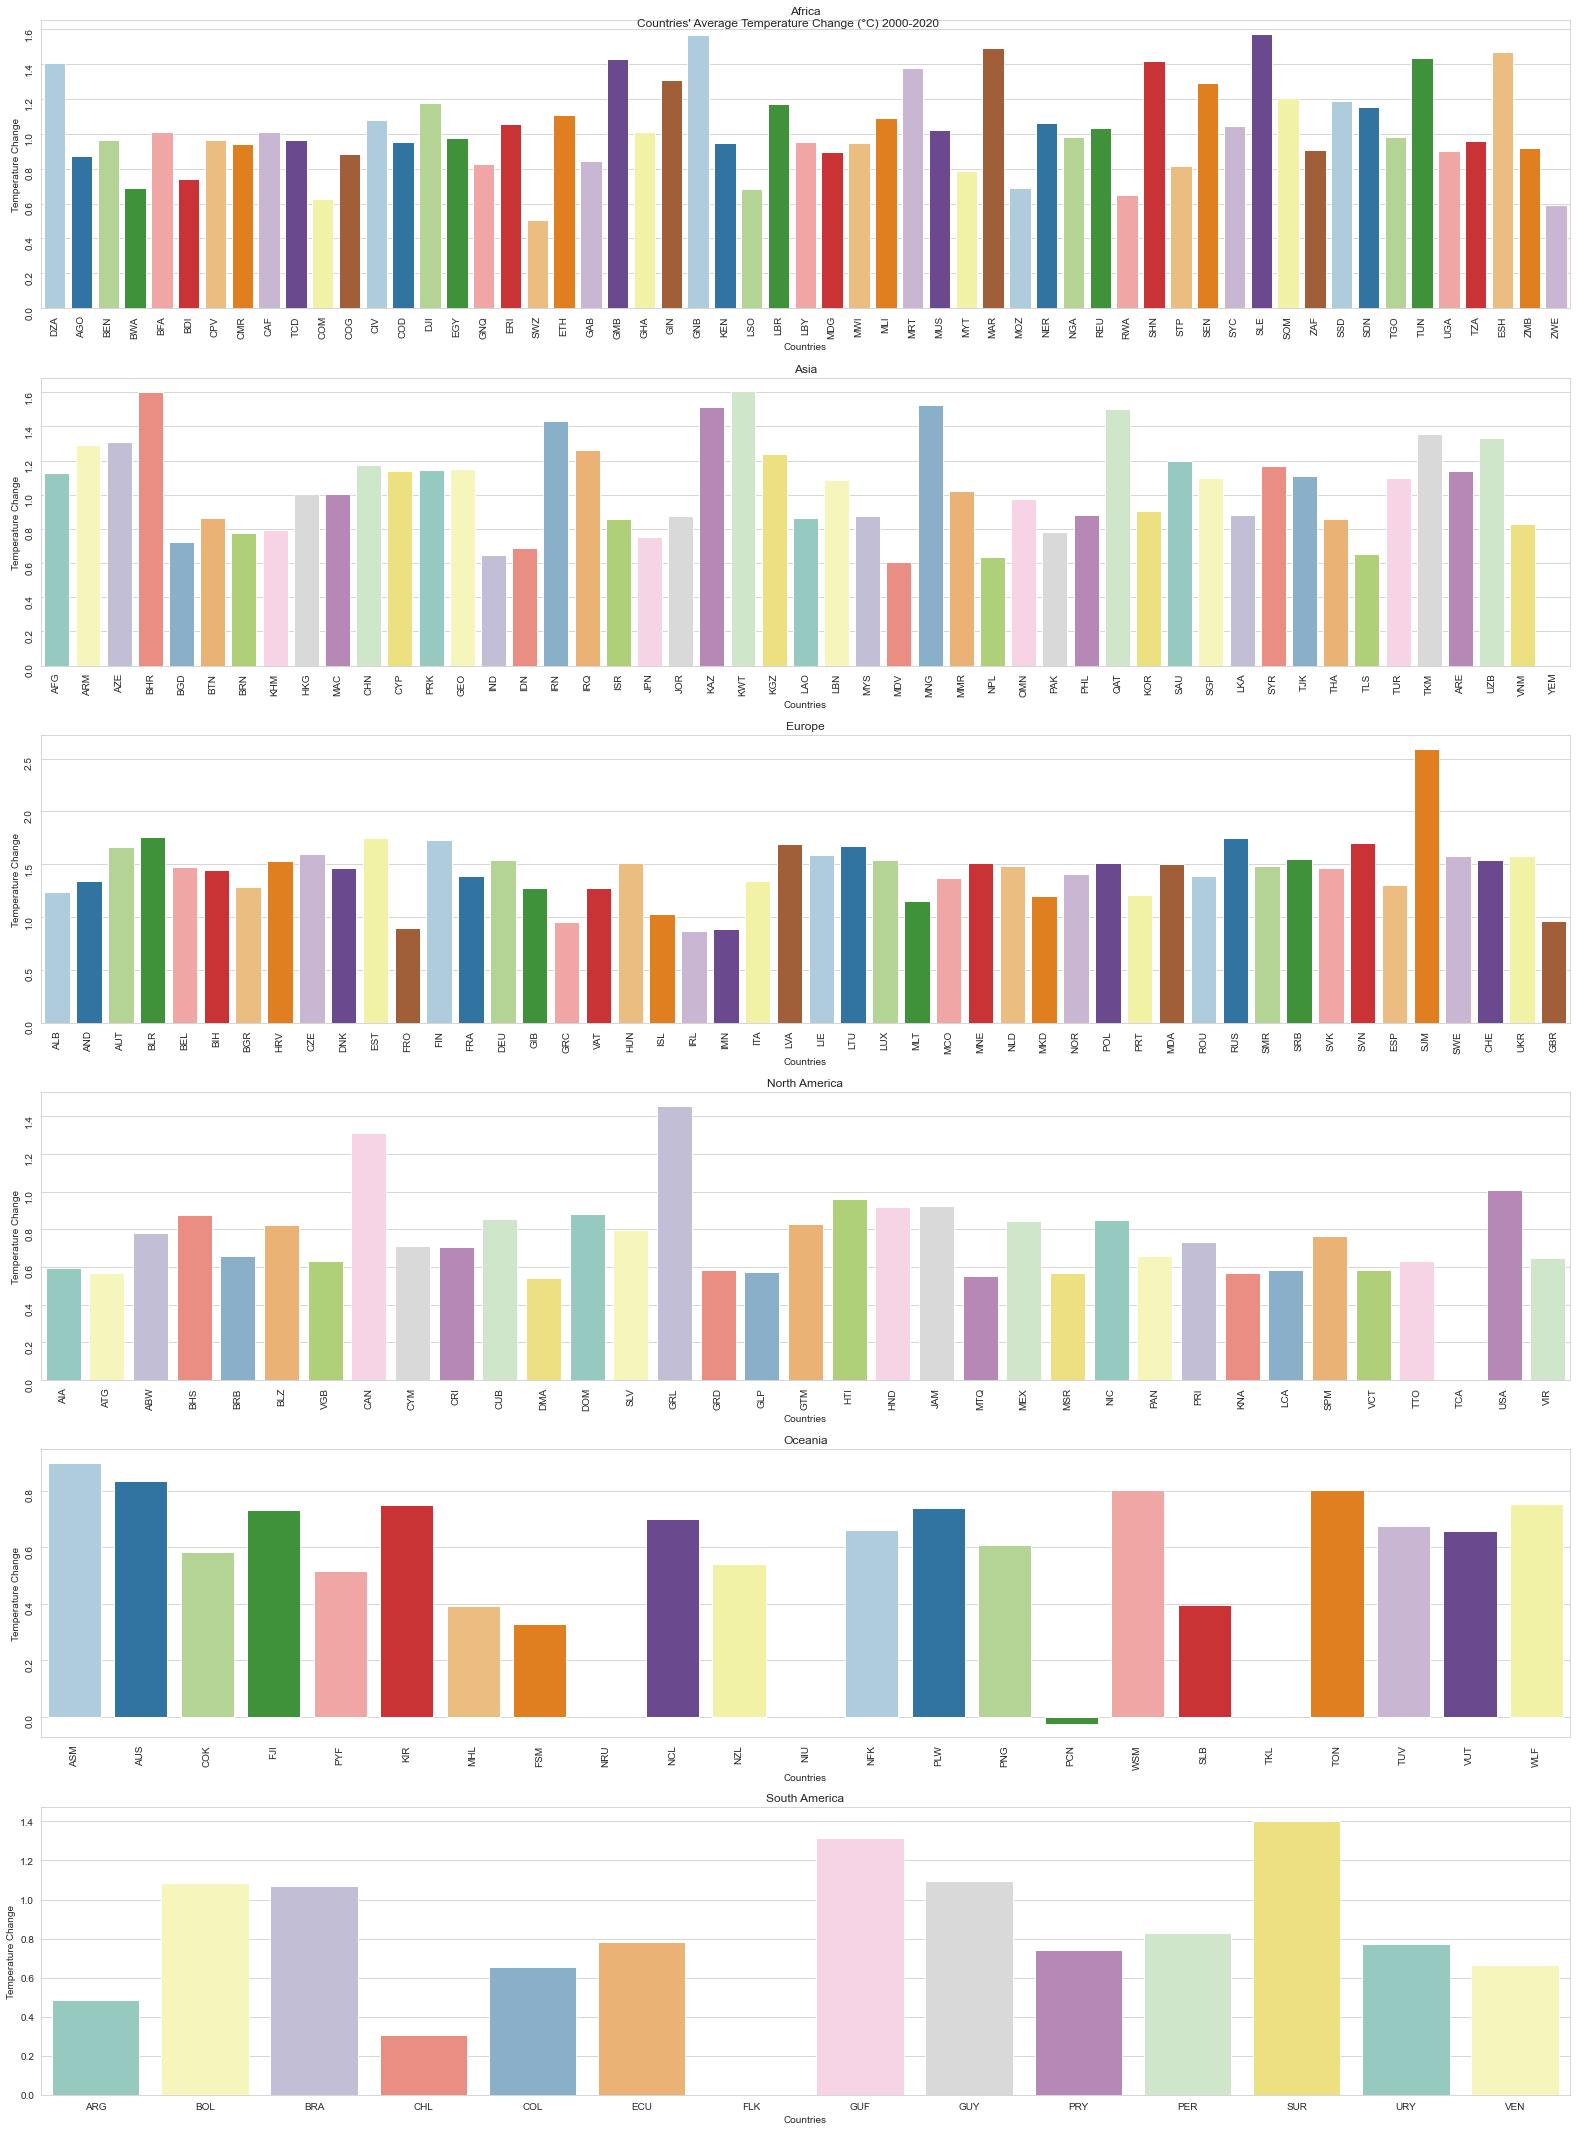

In [48]:
# Countries' mean temperature change from 2000 to 2020 in each continent
fig, ax = plt.subplots(nrows=6, figsize=(22,30))
sns.barplot(x='ISO3', y='Value', data=africa, ax=ax[0], ci=None, palette='Paired').set(title='Africa', xlabel='Countries', ylabel='Temperature Change')
sns.barplot(x='ISO3', y='Value', data=asia, ax=ax[1], ci=None, palette='Set3').set(title='Asia',xlabel='Countries', ylabel='Temperature Change')
sns.barplot(x='ISO3', y='Value', data=europe, ax=ax[2], ci=None, palette='Paired').set(title='Europe', xlabel='Countries', ylabel='Temperature Change')
sns.barplot(x='ISO3', y='Value', data=north_america, ax=ax[3], ci=None, palette='Set3').set(title='North America', xlabel='Countries', ylabel='Temperature Change')
sns.barplot(x='ISO3', y='Value', data=oceania, ax=ax[4], ci=None, palette='Paired').set(title='Oceania', xlabel='Countries', ylabel='Temperature Change')
sns.barplot(x='ISO3', y='Value', data=south_america, ax=ax[5], ci=None, palette='Set3').set(title='South America', xlabel='Countries', ylabel='Temperature Change')
for x in range(0,5):
    ax[x].tick_params(labelrotation=90)
plt.suptitle("Countries' Average Temperature Change (°C) 2000-2020")
plt.tight_layout()

<a id='question5'></a>
### Question 5
###### Which countries in each continent had the greatest temperature change in 2020?
###### Which areas had the highest temperature fluctuation overall?

In [49]:
# Function to shop top 5 maximum values of temperature change
def topfive(continent):
    return continent[continent['Year'] == 2020].sort_values(by='Value', ascending=False).head(5)

Greatest values recorded in each continent:

In [50]:
# Africa
topfive(africa)

Area Code (FAO)            Area  Months Code               Months  \
82755               175   Guinea-Bissau         7020  Meteorological year   
128179              143         Morocco         7020  Meteorological year   
209184              205  Western Sahara         7020  Meteorological year   
72062                75          Gambia         7020  Meteorological year   
176272              201         Somalia         7020  Meteorological year   

        Year  Value Flag Flag Description ISO2 ISO3           Region  \
82755   2020  2.200   Fc  Calculated data   GW  GNB   Western Africa   
128179  2020  2.172   Fc  Calculated data   MA  MAR  Northern Africa   
209184  2020  2.079   Fc  Calculated data   EH  ESH  Northern Africa   
72062   2020  2.050   Fc  Calculated data   GM  GMB   Western Africa   
176272  2020  2.037   Fc  Calculated data   SO  SOM   Eastern Africa   

       Continent Seasons  
82755     Africa     NaN  
128179    Africa     NaN  
209184    Africa     NaN  
72062     Africa     NaN  
176272    Africa     NaN

In [51]:
# Asia
topfive(asia)

Area Code (FAO)                  Area  Months Code  \
100588              108            Kazakhstan         7020   
125884              141              Mongolia         7020   
39048                96  China, Hong Kong SAR         7020   
40068               128      China, Macao SAR         7020   
15265                13               Bahrain         7020   

                     Months  Year  Value Flag Flag Description ISO2 ISO3  \
100588  Meteorological year  2020  2.854   Fc  Calculated data   KZ  KAZ   
125884  Meteorological year  2020  2.360   Fc  Calculated data   MN  MNG   
39048   Meteorological year  2020  2.350   Fc  Calculated data   HK  HKG   
40068   Meteorological year  2020  2.350   Fc  Calculated data   MO  MAC   
15265   Meteorological year  2020  2.119   Fc  Calculated data   BH  BHR   

              Region Continent Seasons  
100588  Central Asia      Asia     NaN  
125884  Eastern Asia      Asia     NaN  
39048   Eastern Asia      Asia     NaN  
40068   Eastern Asia      Asia     NaN  
15265   Western Asia      Asia     NaN

In [52]:
# Europe
topfive(europe)

Area Code (FAO)                Area  Months Code               Months  \
158728              185  Russian Federation         7020  Meteorological year   
61386                63             Estonia         7020  Meteorological year   
17798                57             Belarus         7020  Meteorological year   
105654              119              Latvia         7020  Meteorological year   
111247              126           Lithuania         7020  Meteorological year   

        Year  Value Flag Flag Description ISO2 ISO3           Region  \
158728  2020  3.699   Fc  Calculated data   RU  RUS   Eastern Europe   
61386   2020  3.596   Fc  Calculated data   EE  EST  Northern Europe   
17798   2020  3.518   Fc  Calculated data   BY  BLR   Eastern Europe   
105654  2020  3.513   Fc  Calculated data   LV  LVA  Northern Europe   
111247  2020  3.430   Fc  Calculated data   LT  LTU  Northern Europe   

       Continent Seasons  
158728    Europe     NaN  
61386     Europe     NaN  
17798     Europe     NaN  
105654    Europe     NaN  
111247    Europe     NaN

In [53]:
# North America
topfive(north_america)

Area Code (FAO)         Area  Months Code               Months  Year  \
86835               95     Honduras         7020  Meteorological year  2020   
59397               60  El Salvador         7020  Meteorological year  2020   
80715               89    Guatemala         7020  Meteorological year  2020   
14245               12      Bahamas         7020  Meteorological year  2020   
19175               23       Belize         7020  Meteorological year  2020   

       Value Flag Flag Description ISO2 ISO3           Region      Continent  \
86835  1.853   Fc  Calculated data   HN  HND  Central America  North America   
59397  1.726   Fc  Calculated data   SV  SLV  Central America  North America   
80715  1.714   Fc  Calculated data   GT  GTM  Central America  North America   
14245  1.706   Fc  Calculated data   BS  BHS        Caribbean  North America   
19175  1.653   Fc  Calculated data   BZ  BLZ  Central America  North America   

      Seasons  
86835     NaN  
59397     NaN  
80715     NaN  
14245     NaN  
19175     NaN

In [54]:
# Oceania
topfive(oceania)

Area Code (FAO)                       Area  Months Code  \
190365              219                      Tonga         7020   
11712                10                  Australia         7020   
134299              153              New Caledonia         7020   
102628               83                   Kiribati         7020   
208164              243  Wallis and Futuna Islands         7020   

                     Months  Year  Value Flag Flag Description ISO2 ISO3  \
190365  Meteorological year  2020  1.424   Fc  Calculated data   TO  TON   
11712   Meteorological year  2020  1.404   Fc  Calculated data   AU  AUS   
134299  Meteorological year  2020  1.366   Fc  Calculated data   NC  NCL   
102628  Meteorological year  2020  1.307   Fc  Calculated data   KI  KIR   
208164  Meteorological year  2020  1.256   Fc  Calculated data   WF  WLF   

                           Region Continent Seasons  
190365                  Polynesia   Oceania     NaN  
11712   Australia and New Zealand   Oceania     NaN  
134299                  Melanesia   Oceania     NaN  
102628                 Micronesia   Oceania     NaN  
208164                  Polynesia   Oceania     NaN

In [55]:
# South America
topfive(south_america)

Area Code (FAO)                              Area  Months Code  \
180692              207                          Suriname         7020   
69002                69                     French Guyana         7020   
22235                19  Bolivia (Plurinational State of)         7020   
147542              169                          Paraguay         7020   
148562              170                              Peru         7020   

                     Months  Year  Value Flag Flag Description ISO2 ISO3  \
180692  Meteorological year  2020  2.143   Fc  Calculated data   SR  SUR   
69002   Meteorological year  2020  1.964   Fc  Calculated data   GF  GUF   
22235   Meteorological year  2020  1.667   Fc  Calculated data   BO  BOL   
147542  Meteorological year  2020  1.558   Fc  Calculated data   PY  PRY   
148562  Meteorological year  2020  1.502   Fc  Calculated data   PE  PER   

               Region      Continent Seasons  
180692  South America  South America     NaN  
69002   South America  South America     NaN  
22235   South America  South America     NaN  
147542  South America  South America     NaN  
148562  South America  South America     NaN

Areas with the most fluctuaution of temperature:

In [56]:
# Areas with most increased temperature in a year
meteorological_year.loc[meteorological_year['Value'].sort_values(ascending=False).index].head(10)

Area Code (FAO)                            Area  Months Code  \
181708              260  Svalbard and Jan Mayen Islands         7020   
181710              260  Svalbard and Jan Mayen Islands         7020   
181698              260  Svalbard and Jan Mayen Islands         7020   
181704              260  Svalbard and Jan Mayen Islands         7020   
158728              185              Russian Federation         7020   
61386                63                         Estonia         7020   
17798                57                         Belarus         7020   
105654              119                          Latvia         7020   
111247              126                       Lithuania         7020   
181706              260  Svalbard and Jan Mayen Islands         7020   

                     Months  Year  Value Flag Flag Description ISO2 ISO3  \
181708  Meteorological year  2016  5.328   Fc  Calculated data   SJ  SJM   
181710  Meteorological year  2018  4.066   Fc  Calculated data   SJ  SJM   
181698  Meteorological year  2006  3.885   Fc  Calculated data   SJ  SJM   
181704  Meteorological year  2012  3.825   Fc  Calculated data   SJ  SJM   
158728  Meteorological year  2020  3.699   Fc  Calculated data   RU  RUS   
61386   Meteorological year  2020  3.596   Fc  Calculated data   EE  EST   
17798   Meteorological year  2020  3.518   Fc  Calculated data   BY  BLR   
105654  Meteorological year  2020  3.513   Fc  Calculated data   LV  LVA   
111247  Meteorological year  2020  3.430   Fc  Calculated data   LT  LTU   
181706  Meteorological year  2014  3.383   Fc  Calculated data   SJ  SJM   

                 Region Continent Seasons  
181708  Northern Europe    Europe     NaN  
181710  Northern Europe    Europe     NaN  
181698  Northern Europe    Europe     NaN  
181704  Northern Europe    Europe     NaN  
158728   Eastern Europe    Europe     NaN  
61386   Northern Europe    Europe     NaN  
17798    Eastern Europe    Europe     NaN  
105654  Northern Europe    Europe     NaN  
111247  Northern Europe    Europe     NaN  
181706  Northern Europe    Europe     NaN

In [57]:
# Areas and Years with most decreased temperature
meteorological_year.loc[meteorological_year['Value'].sort_values().index].head(10)

Area Code (FAO)                            Area  Months Code  \
181660              260  Svalbard and Jan Mayen Islands         7020   
181658              260  Svalbard and Jan Mayen Islands         7020   
181655              260  Svalbard and Jan Mayen Islands         7020   
181680              260  Svalbard and Jan Mayen Islands         7020   
77618                85                       Greenland         7020   
33900                33                          Canada         7020   
66908                67                         Finland         7020   
181661              260  Svalbard and Jan Mayen Islands         7020   
182678              210                          Sweden         7020   
141878              162                          Norway         7020   

                     Months  Year  Value Flag Flag Description ISO2 ISO3  \
181660  Meteorological year  1968 -3.251   Fc  Calculated data   SJ  SJM   
181658  Meteorological year  1966 -2.357   Fc  Calculated data   SJ  SJM   
181655  Meteorological year  1963 -2.245   Fc  Calculated data   SJ  SJM   
181680  Meteorological year  1988 -2.107   Fc  Calculated data   SJ  SJM   
77618   Meteorological year  1983 -2.076   Fc  Calculated data   GL  GRL   
33900   Meteorological year  1972 -1.799   Fc  Calculated data   CA  CAN   
66908   Meteorological year  1966 -1.796   Fc  Calculated data   FI  FIN   
181661  Meteorological year  1969 -1.740   Fc  Calculated data   SJ  SJM   
182678  Meteorological year  1966 -1.664   Fc  Calculated data   SE  SWE   
141878  Meteorological year  1966 -1.637   Fc  Calculated data   NO  NOR   

                  Region      Continent Seasons  
181660   Northern Europe         Europe     NaN  
181658   Northern Europe         Europe     NaN  
181655   Northern Europe         Europe     NaN  
181680   Northern Europe         Europe     NaN  
77618   Northern America  North America     NaN  
33900   Northern America  North America     NaN  
66908    Northern Europe         Europe     NaN  
181661   Northern Europe         Europe     NaN  
182678   Northern Europe         Europe     NaN  
141878   Northern Europe         Europe     NaN

<a id='question6'></a>
### Question 6
###### What's the association between temperature change and population?

In [58]:
# making a matrix to later use for correlation method
col1 = meteorological_year.groupby('Year')['Value'].mean()
year_index = world_population.set_index('Year')
col2 = year_index['World Population']
population_temp =pd.concat([col1, col2], axis=1)

**Correlation between population and changes in temperature:**

In [59]:
population_temp.corr()

Value  World Population
Value             1.000000          0.936651
World Population  0.936651          1.000000

Text(0.5, 1.0, 'Relationship between Temperature Change (°C) and World Population')

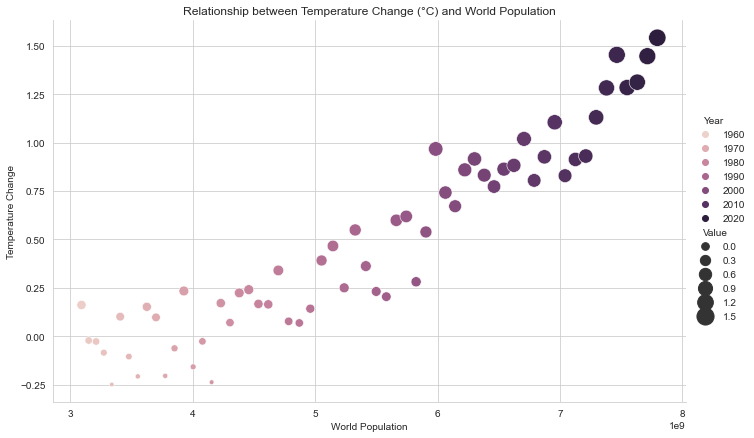

In [60]:
# Relation plot of the world population and temperature change
sns.relplot(data=population_temp, x='World Population', y="Value", hue="Year", size='Value', sizes=(20, 300), height=6,aspect=13/8)
plt.ylabel('Temperature Change')
plt.title('Relationship between Temperature Change (°C) and World Population')

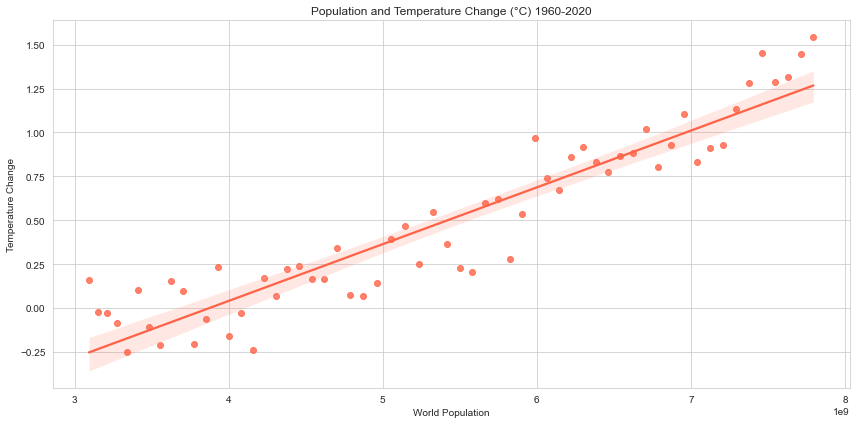

In [61]:
# Regression of temperature change and population of the world
plt.figure(figsize=(12,6))
sns.regplot(x='World Population', y='Value', data=population_temp, color='tomato')
plt.ylabel('Temperature Change')
plt.title('Population and Temperature Change (°C) 1960-2020')
plt.tight_layout()

So we can conclude that world population and world temperature change are correlated; increase in one is associated with the increase in another.

<a id='question7'></a>
### Question 7
##### Is there an assiciation between the economic expansion and temperature change?

In [62]:
# GDP of each continent
afgdp = gdp_transposed['Africa']
asgdp = gdp_transposed['Asia']
eugdp = gdp_transposed['Europe']
nagdp = gdp_transposed['North America']
ocgdp = gdp_transposed['Oceania']
sagdp = gdp_transposed['South America']

In [63]:
# Temperature change value of each continent
aftc = meteorological_year[meteorological_year['Continent'] == 'Africa'].groupby('Year').mean()['Value']
astc = meteorological_year[meteorological_year['Continent'] == 'Asia'].groupby('Year').mean()['Value']
eutc = meteorological_year[meteorological_year['Continent'] == 'Europe'].groupby('Year').mean()['Value']
natc = meteorological_year[meteorological_year['Continent'] == 'North America'].groupby('Year').mean()['Value']
octc = meteorological_year[meteorological_year['Continent'] == 'Oceania'].groupby('Year').mean()['Value']
satc = meteorological_year[meteorological_year['Continent'] == 'South America'].groupby('Year').mean()['Value']

In [64]:
# matrixes of temperature change and GDP to later be used for correlation test
af_gdp_merge = pd.merge(afgdp, aftc, left_index=True, right_index=True)
as_gdp_merge = pd.merge(asgdp, astc, left_index=True, right_index=True)
eu_gdp_merge = pd.merge(eugdp, eutc, left_index=True, right_index=True)
na_gdp_merge = pd.merge(nagdp, natc, left_index=True, right_index=True)
oc_gdp_merge = pd.merge(ocgdp, octc, left_index=True, right_index=True)
sa_gdp_merge = pd.merge(sagdp, satc, left_index=True, right_index=True)

**Now cheking the correlation between GDP and temperature in each continent from 1960 to 2020:**

("Value" represents the temperature change and the names of the continents show GDP)

In [65]:
# Africa
af_gdp_merge.corr()

Africa     Value
Africa  1.000000  0.846191
Value   0.846191  1.000000

In [66]:
# Asia
as_gdp_merge.corr()

Asia     Value
Asia   1.000000  0.853782
Value  0.853782  1.000000

In [67]:
# Europe
eu_gdp_merge.corr()

Europe     Value
Europe  1.000000  0.832858
Value   0.832858  1.000000

In [68]:
# North America
na_gdp_merge.corr()

North America     Value
North America       1.000000  0.868624
Value               0.868624  1.000000

In [69]:
# Oceania
oc_gdp_merge.corr()

Oceania     Value
Oceania  1.000000  0.845151
Value    0.845151  1.000000

In [70]:
# South America
sa_gdp_merge.corr()

South America     Value
South America       1.000000  0.819915
Value               0.819915  1.000000

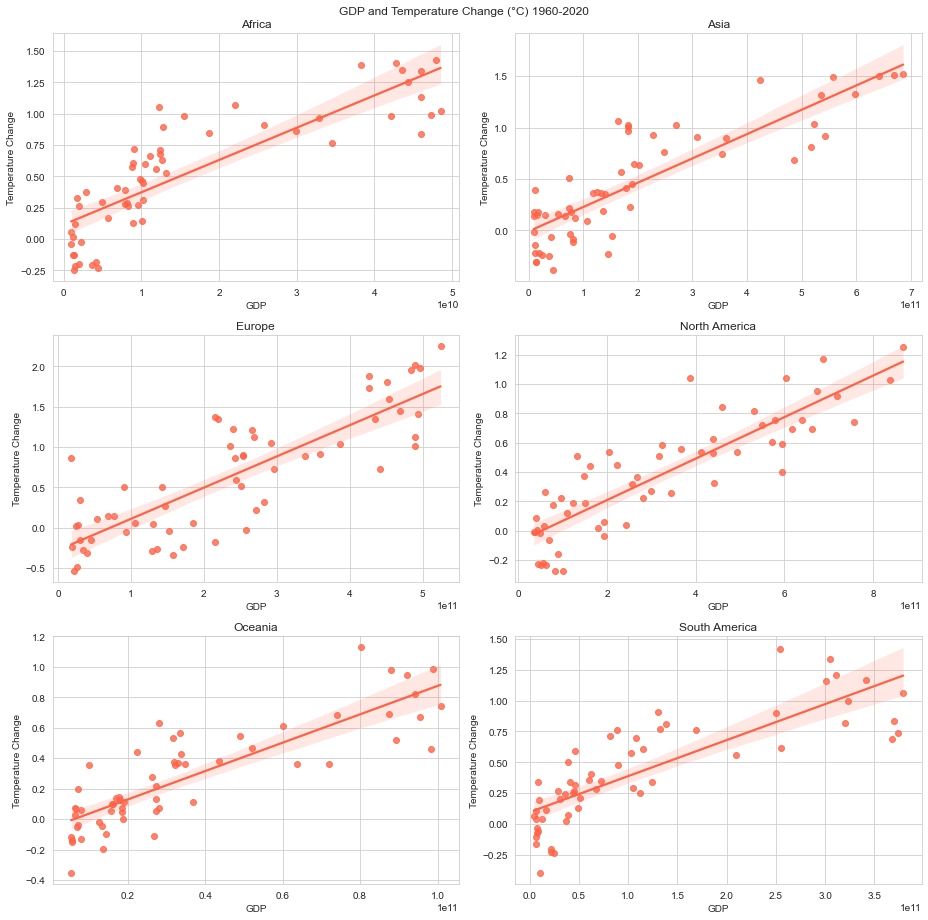

In [71]:
# Regression plot of GDP values against temperature change in each continent
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(13,13))
sns.regplot(x='Africa', y='Value', data=af_gdp_merge, ax=ax[0,0], color='tomato').set(title='Africa', xlabel='GDP', ylabel='Temperature Change')
sns.regplot(x='Asia', y='Value', data=as_gdp_merge, ax=ax[0,1], color='tomato').set(title='Asia', xlabel='GDP', ylabel='Temperature Change')
sns.regplot(x='Europe', y='Value', data=eu_gdp_merge, ax=ax[1,0], color='tomato').set(title='Europe', xlabel='GDP', ylabel='Temperature Change')
sns.regplot(x='North America', y='Value', data=na_gdp_merge, ax=ax[1,1], color='tomato').set(title='North America', xlabel='GDP', ylabel='Temperature Change')
sns.regplot(x='Oceania', y='Value', data=oc_gdp_merge, ax=ax[2,0], color='tomato').set(title='Oceania', xlabel='GDP', ylabel='Temperature Change')
sns.regplot(x='South America', y='Value', data=sa_gdp_merge, ax=ax[2,1], color='tomato').set(title='South America', xlabel='GDP', ylabel='Temperature Change')
plt.suptitle('GDP and Temperature Change (°C) 1960-2020')
plt.tight_layout()

It appears that the world population and world temperature change are associated with each other in all continents.

<a id='question8'></a>
### Question 8
###### Does agriculture growth correlate with temperature change?

In [72]:
def agrContinent(continent):
    return agriculture[continent]

In [73]:
# Each continent's area of agricultural land
africa_agr = agrContinent('Africa')
asia_agr = agrContinent('Asia')
europe_agr = agrContinent('Europe')
north_america_agr = agrContinent('North America')
oceania_agr = agrContinent('Oceania')
south_america_agr = agrContinent('South America')

In [74]:
# matrixes of each continent's temperature change value and area of agriculture to later be used in correlation test
af_agr_merge = pd.merge(africa_agr, aftc, left_index=True, right_index=True)
as_agr_merge = pd.merge(asia_agr, astc, left_index=True, right_index=True)
eu_agr_merge = pd.merge(europe_agr, eutc, left_index=True, right_index=True)
na_agr_merge = pd.merge(north_america_agr, natc, left_index=True, right_index=True)
oc_agr_merge = pd.merge(oceania_agr, octc, left_index=True, right_index=True)
sa_agr_merge = pd.merge(south_america_agr, satc, left_index=True, right_index=True)

**Checking the correlation between agricultural land growth and temperature change in each continent (over the course of 1960 to 2020):**

"Value" represents temperature change 

In [75]:
# Africa
af_agr_merge.corr()

Africa     Value
Africa  1.000000  0.869383
Value   0.869383  1.000000

In [76]:
# Asia
as_agr_merge.corr()

Asia     Value
Asia   1.000000  0.786127
Value  0.786127  1.000000

In [77]:
# Europe
eu_agr_merge.corr()

Europe     Value
Europe  1.000000  0.647786
Value   0.647786  1.000000

In [78]:
# North America
na_agr_merge.corr()

North America    Value
North America        1.00000 -0.74712
Value               -0.74712  1.00000

In [79]:
# Oceania
oc_agr_merge.corr()

Oceania     Value
Oceania  1.000000 -0.832862
Value   -0.832862  1.000000

In [80]:
# South America
sa_agr_merge.corr()

South America     Value
South America       1.000000  0.584278
Value               0.584278  1.000000

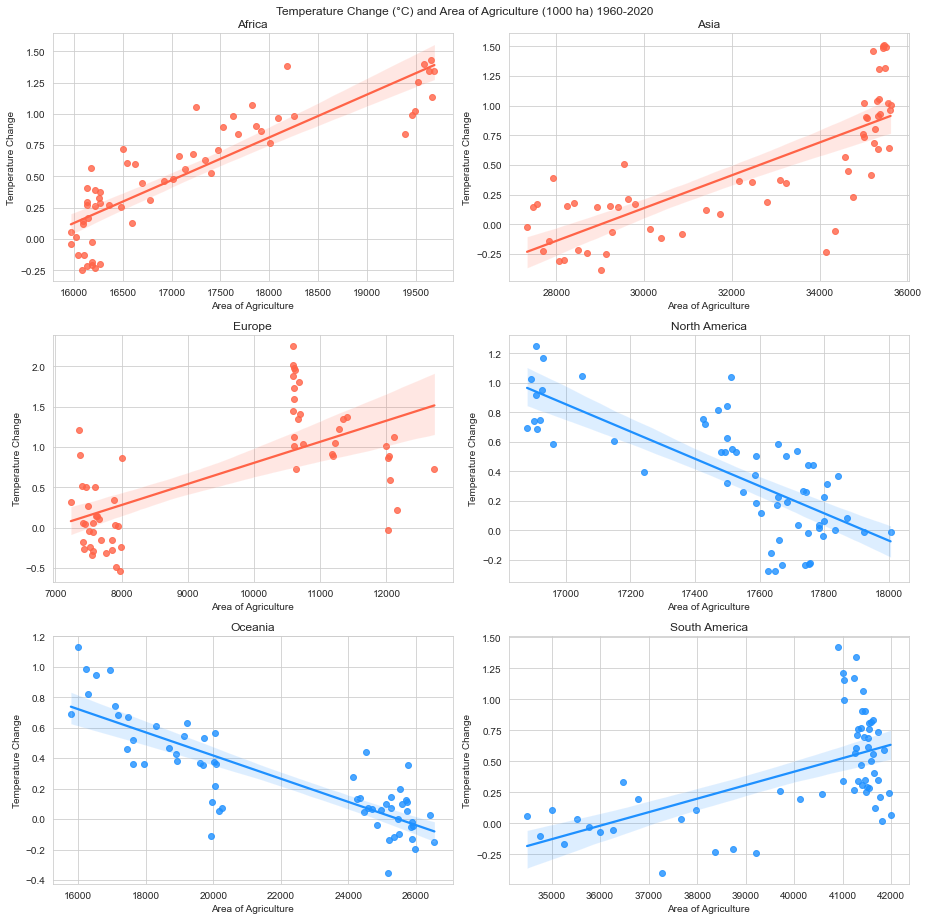

In [81]:
# Total area of agricultural lands against temperature change in each continent 
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(13,13))
sns.regplot(x='Africa', y='Value', data=af_agr_merge, ax=ax[0,0], color='tomato').set(title='Africa', xlabel='Area of Agriculture', ylabel='Temperature Change')
sns.regplot(x='Asia', y='Value', data=as_agr_merge, ax=ax[0,1], color='tomato').set(title='Asia', xlabel='Area of Agriculture', ylabel='Temperature Change')
sns.regplot(x='Europe', y='Value', data=eu_agr_merge, ax=ax[1,0], color='tomato').set(title='Europe', xlabel='Area of Agriculture', ylabel='Temperature Change')
sns.regplot(x='North America', y='Value', data=na_agr_merge, ax=ax[1,1], color='dodgerblue').set(title='North America', xlabel='Area of Agriculture', ylabel='Temperature Change')
sns.regplot(x='Oceania', y='Value', data=oc_agr_merge, ax=ax[2,0], color='dodgerblue').set(title='Oceania', xlabel='Area of Agriculture', ylabel='Temperature Change')
sns.regplot(x='South America', y='Value', data=sa_agr_merge, ax=ax[2,1], color='dodgerblue').set(title='South America', xlabel='Area of Agriculture', ylabel='Temperature Change')
plt.suptitle('Temperature Change (°C) and Area of Agriculture (1000 ha) 1960-2020')
plt.tight_layout()

It appears that agricultural land area and temperature change are positively associated in Africa, Asia, and Europe but negatively associated in North America and Oceania. They are positively associated in South America too, but are less significant.

<a id='question9'></a>
### Question 9
###### How do different greenhouse gases affect temperature change?

In [82]:
# Each continent's CO2 values
afco2 =africa_ghg['CO2']
asco2= asia_ghg['CO2']
euco2 =europe_ghg['CO2']
naco2 =north_america_ghg['CO2']
occo2 =oceania_ghg['CO2']
saco2 =south_america_ghg['CO2']

In [83]:
# Each continent's greenhouse gas section from the dataset
africa_ghg = ghgByYear('Africa')
asia_ghg = ghgByYear('Asia')
europe_ghg = ghgByYear('Europe')
north_america_ghg = ghgByYear('North America')
oceania_ghg = ghgByYear('Oceania')
south_america_ghg = ghgByYear('South America')

In [84]:
# matrix of temperature change and CO2 in each continent
af_ghg_merge = pd.merge(afco2, aftc, left_index=True, right_index=True)
as_ghg_merge = pd.merge(asco2, astc, left_index=True, right_index=True)
eu_ghg_merge = pd.merge(euco2, eutc, left_index=True, right_index=True)
na_ghg_merge = pd.merge(naco2, natc, left_index=True, right_index=True)
oc_ghg_merge = pd.merge(occo2, octc, left_index=True, right_index=True)
sa_ghg_merge = pd.merge(saco2, satc, left_index=True, right_index=True)

**Checking the correlation between CO2 levels and temperature Change"**

("Value" shows the changes in temperature)

In [85]:
# Africa
af_ghg_merge.corr()

CO2     Value
CO2    1.000000  0.915802
Value  0.915802  1.000000

In [86]:
# Asia
as_ghg_merge.corr()

CO2     Value
CO2    1.000000  0.872743
Value  0.872743  1.000000

In [87]:
# Europe
eu_ghg_merge.corr()

CO2    Value
CO2    1.00000  0.69944
Value  0.69944  1.00000

In [88]:
# North America
na_ghg_merge.corr()

CO2     Value
CO2    1.000000  0.649752
Value  0.649752  1.000000

In [89]:
# Oceania
oc_ghg_merge.corr()

CO2     Value
CO2    1.000000  0.837224
Value  0.837224  1.000000

In [90]:
# South America
sa_ghg_merge.corr()

CO2     Value
CO2    1.000000  0.874677
Value  0.874677  1.000000

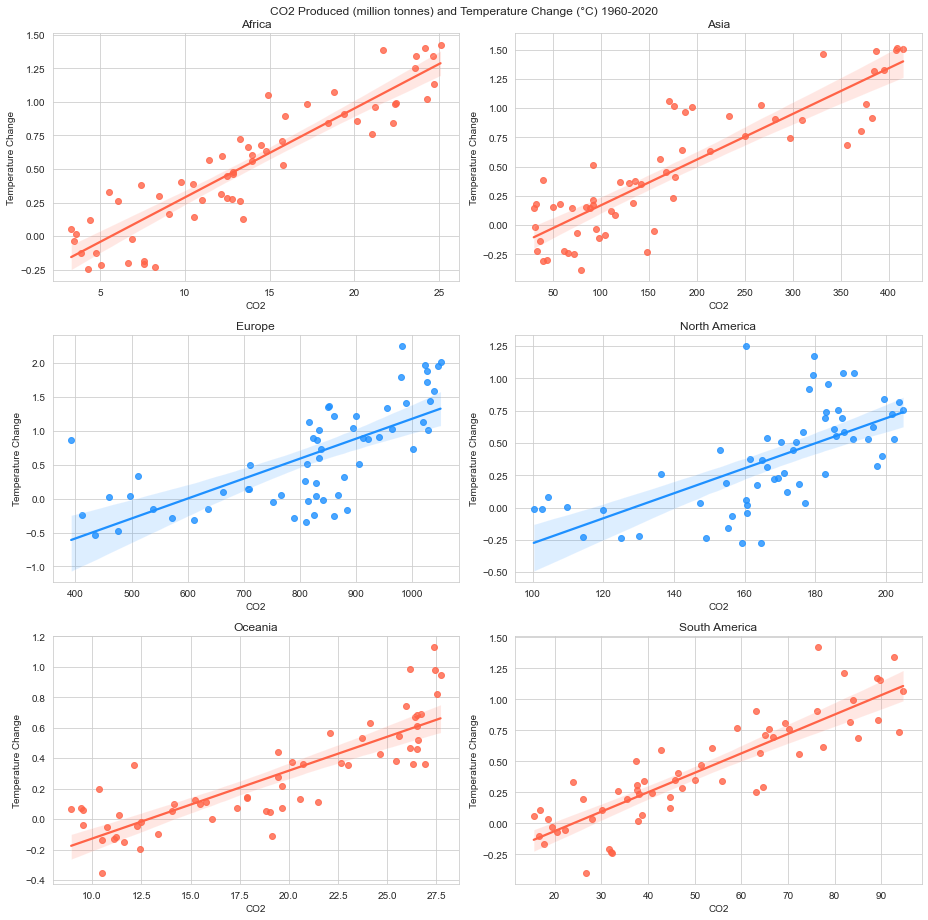

In [91]:
# Amount of CO2 produced against temperature change of each continent
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(13,13))
sns.regplot(x='CO2', y='Value', data=af_ghg_merge, ax=ax[0,0], color='tomato').set(title='Africa', ylabel='Temperature Change')
sns.regplot(x='CO2', y='Value', data=as_ghg_merge, ax=ax[0,1], color='tomato').set(title='Asia', ylabel='Temperature Change')
sns.regplot(x='CO2', y='Value', data=eu_ghg_merge, ax=ax[1,0], color='dodgerblue').set(title='Europe', ylabel='Temperature Change')
sns.regplot(x='CO2', y='Value', data=na_ghg_merge, ax=ax[1,1], color='dodgerblue').set(title='North America', ylabel='Temperature Change')
sns.regplot(x='CO2', y='Value', data=oc_ghg_merge, ax=ax[2,0], color='tomato').set(title='Oceania', ylabel='Temperature Change')
sns.regplot(x='CO2', y='Value', data=sa_ghg_merge, ax=ax[2,1], color='tomato').set(title='South America', ylabel='Temperature Change')
plt.suptitle('CO2 Produced (million tonnes) and Temperature Change (°C) 1960-2020')
plt.tight_layout()

Temperature change and produced CO2 are associated with each other in all continents. 

<a id='question10'></a>
### Question 10
##### Are GDP and greenhouse gases associated?

In [92]:
# Each continent's total value of greenhouse gases
afghg = africa_ghg['Total GHG']
asghg = asia_ghg['Total GHG']
eughg = europe_ghg['Total GHG']
naghg = north_america_ghg['Total GHG']
ocghg = oceania_ghg['Total GHG']
saghg = south_america_ghg['Total GHG']

In [93]:
# matrix of GDP and total greenhouse gases of each continent
af_gdp_ghg = pd.merge(afghg, afgdp, left_index=True, right_index=True)
as_gdp_ghg = pd.merge(asghg, asgdp, left_index=True, right_index=True)
eu_gdp_ghg = pd.merge(eughg, eugdp, left_index=True, right_index=True)
na_gdp_ghg = pd.merge(naghg, nagdp, left_index=True, right_index=True)
oc_gdp_ghg = pd.merge(ocghg, ocgdp, left_index=True, right_index=True)
sa_gdp_ghg = pd.merge(saghg, sagdp, left_index=True, right_index=True)

**Checking the correlation between GDP growth and total greenhouse gases emitted from 1961 to 2020:**

(Name of each continent represent the GDP)

In [94]:
# Africa
af_gdp_ghg.corr()

Total GHG    Africa
Total GHG   1.000000  0.926276
Africa      0.926276  1.000000

In [95]:
# Asia
as_gdp_ghg.corr()

Total GHG     Asia
Total GHG    1.00000  0.98039
Asia         0.98039  1.00000

In [96]:
# Europe
eu_gdp_ghg.corr()

Total GHG    Europe
Total GHG   1.000000 -0.663056
Europe     -0.663056  1.000000

In [97]:
# North America
na_gdp_ghg.corr()

Total GHG  North America
Total GHG       1.000000       0.588339
North America   0.588339       1.000000

In [98]:
# Oceania
oc_gdp_ghg.corr()

Total GHG   Oceania
Total GHG   1.000000  0.084269
Oceania     0.084269  1.000000

In [99]:
# South America
sa_gdp_ghg.corr()

Total GHG  South America
Total GHG       1.000000      -0.115459
South America  -0.115459       1.000000

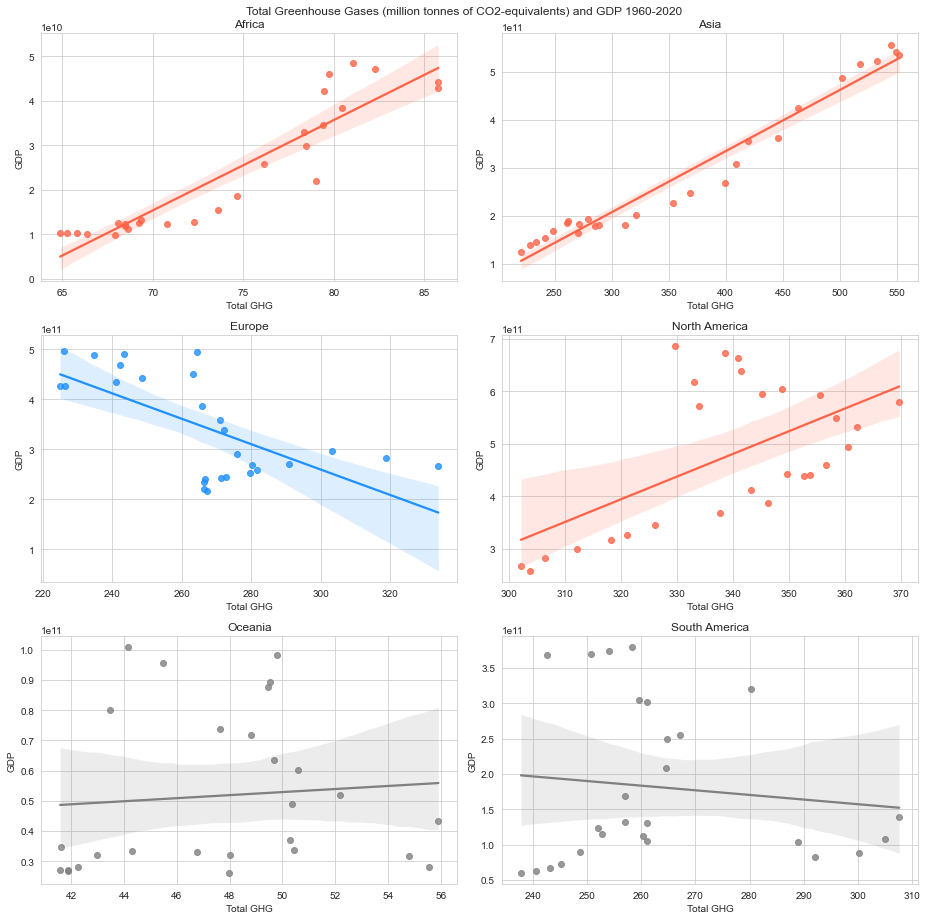

In [100]:
# Total greenhouse gases against GDP growth of each continent, 1960 to 2020
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(13,13))
sns.regplot(x='Total GHG', y='Africa', data=af_gdp_ghg, ax=ax[0,0], color='tomato').set(title='Africa', ylabel='GDP')
sns.regplot(x='Total GHG', y='Asia', data=as_gdp_ghg, ax=ax[0,1], color='tomato').set(title='Asia', ylabel='GDP')
sns.regplot(x='Total GHG', y='Europe', data=eu_gdp_ghg, ax=ax[1,0], color='dodgerblue').set(title='Europe', ylabel='GDP')
sns.regplot(x='Total GHG', y='North America', data=na_gdp_ghg, ax=ax[1,1], color='tomato').set(title='North America', ylabel='GDP')
sns.regplot(x='Total GHG', y='Oceania', data=oc_gdp_ghg, ax=ax[2,0], color='grey').set(title='Oceania', ylabel='GDP')
sns.regplot(x='Total GHG', y='South America', data=sa_gdp_ghg, ax=ax[2,1], color='grey').set(title='South America', ylabel='GDP')
plt.suptitle('Total Greenhouse Gases (million tonnes of CO2-equivalents) and GDP 1960-2020')
plt.tight_layout()

GDP and total value of greenhouse gases are strongly associated in Africa and Asia but less strongly in North America. They appears to have a negative association in Europe. There's also not enough data on Oceania and South America, to give us a meaningful plot.

## Conclusion

Global temperature change appears to be associated with population growth, economic expansion, growth in agricultural lands, and the amount of greenhouse gases emitted into the atmosphere. <br>
Earth's temperature is rising and we are causing it and making it rapidly increase with our actions. <br>
I hope we can slow it down and undo it before it's too late to be reversed.